In [8]:
# Importing dataset
import os
from os import listdir
from os import path
from os.path import isfile, join, getsize
import pandas as pd
import numpy as np
from pycaret.classification import *
import seaborn as sns
import pickle
from dtw import dtw

import time
import librosa
from dtw import dtw
import librosa.display
from scipy.spatial.distance import cdist

In [9]:
os.chdir('/home/jupyter-chandler.vaughn/data/')
merged_training_MFCC = pd.read_pickle('merged_training_MFCC.pickle')
plagerism_unseen_MFCC = pd.read_pickle('plagerism_unseen_MFCC.pickle')

In [10]:
merged_training_MFCC[4:5]

pair                                       song_1  \
4  America  simon_and_garfunkel+Bookends+03-America.mp3   

                                              song_2  \
4  paul_simon+Concert_in_the_Park_Disc_2+09-Ameri...   

                                              MFCC_1  \
4  [[7.347216e-33, 9.81343e-31, 2.050909e-31, 2.1...   

                                              MFCC_2  sim_distance  \
4  [[4.172271e-33, 4.948781e-31, 2.8568914e-30, 1...     -3.877601   

                                         MFCC_1_bass  \
4  [[5.1289785e-08, 2.2343607e-16, 0.0, 0.0, 0.0,...   

                                        MFCC_1_drums  \
4  [[1.9433915e-07, 9.2944025e-17, 0.0, 0.0, 0.0,...   

                                       MFCC_1_vocals  \
4  [[5.528725e-05, 8.899993e-15, 3.85937e-13, 2.5...   

                                        MFCC_1_other  ...  \
4  [[5.531092e-05, 2.2850404e-14, 2.2481738e-13, ...  ...   

                                        MFCC_2_drums  \
4  [[2.2889071e-07, 3.9523525e-18, 0.0, 0.0, 1.77...   

                                       MFCC_2_vocals  \
4  [[1.0341807e-05, 7.608321e-15, 0.0, 1.7406323e...   

                                        MFCC_2_other sim_distance_bass  \
4  [[7.2292114e-06, 5.569887e-15, 0.0, 2.381739e-...         -4.010184   

   sim_distance_drums  sim_distance_vocals  sim_distance_other  \
4           -3.278129            -3.577138           -3.629846   

   sim_distance_argmin  sim_distance_argmin_combined  target  
4            -4.010184                     -4.010184       1  

[1 rows x 21 columns]

In [4]:
merged_training_MFCC[4:5]['MFCC_1'][4].shape

(40, 13461)

In [84]:
mfcc1 = merged_training_MFCC[1:2]['MFCC_1'][1]
mfcc2 = merged_training_MFCC[1:2]['MFCC_2'][1]

In [87]:
#mean all the bands
mfcc1 = np.mean(mfcc1, axis = 1)
mfcc2 = np.mean(mfcc2, axis = 1)

In [88]:
l2_norm = lambda x, y: (x - y) ** 2

dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
print('Normalized distance between the two sounds:', dist)

Normalized distance between the two sounds: 0.0012865849316100136


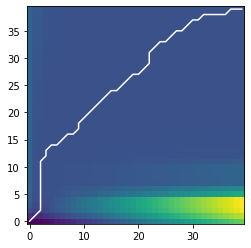

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

In [11]:
dataframe_columns = ['pair',
                     'song_1',
                     'song_2',
                     'sim_distance_bass',
                     'sim_distance_drums',
                     'sim_distance_vocals',
                     'sim_distance_other',
                     'sim_distance_argmin',
                     'sim_distance_argmin_combined',
                     'DTW',
                     'DTW_bass',
                     'DTW_drums',
                     'DTW_vocals',
                     'DTW_other',
                     'DTW_acc_cost_matrix',
                     'DTW_acc_cost_matrix_bass',
                     'DTW_acc_cost_matrix_drums',
                     'DTW_acc_cost_matrix_vocals',
                     'DTW_acc_cost_matrix_other',
                     'DTW_path',
                     'DTW_path_bass',
                     'DTW_path_drums',
                     'DTW_path_vocals',
                     'DTW_path_other',
                     'sim_distance',
                     'target']

def process_row(index, row):
    global dataframe_columns
    final_df = pd.DataFrame(columns=dataframe_columns)
    results = pd.DataFrame()
    i0 = index
    i1 = index+1

    #reset variables
    pair = ''
    song_1 = ''
    song_2 = ''
    sim_distance_bass = ''
    sim_distance_drums = ''
    sim_distance_vocals = ''
    sim_distance_other = ''
    sim_distance_argmin = ''
    sim_distance_argmin_combined = ''
    DTW = ''
    DTW_bass = ''
    DTW_drums = ''
    DTW_vocals = ''
    DTW_other = ''
    DTW_acc_cost_matrix = ''
    DTW_acc_cost_matrix_bass = ''
    DTW_acc_cost_matrix_drums = ''
    DTW_acc_cost_matrix_vocals = ''
    DTW_acc_cost_matrix_other = ''
    DTW_path = ''
    DTW_path_bass = ''
    DTW_path_drums = ''
    DTW_path_vocals = ''
    DTW_path_other = ''
    sim_distance = ''
    target = ''
   
    pair = row['pair']
    song_1 = row['song_1']
    song_2 = row['song_2']
    sim_distance_bass = row['sim_distance_bass']
    sim_distance_drums = row['sim_distance_drums']
    sim_distance_vocals = row['sim_distance_vocals']
    sim_distance_other = row['sim_distance_other']
    sim_distance_argmin = row['sim_distance_argmin']
    sim_distance_argmin_combined = row['sim_distance_argmin_combined']
    sim_distance = row['sim_distance']
    target = row['target']

    
    
    #find overall songs DTW
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW = dist
    DTW_acc_cost_matrix = acc_cost_matrix
    DTW_path = path
   


    #find stem DTW - bass
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_bass'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_bass'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_bass = dist
    DTW_acc_cost_matrix_bass = acc_cost_matrix
    DTW_path_bass = path
   
    #find stem DTW - drums
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_drums'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_drums'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_drums = dist
    DTW_acc_cost_matrix_drums = acc_cost_matrix
    DTW_path_drums = path

    #find stem DTW - vocals
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_vocals'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_vocals'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_vocals = dist
    DTW_acc_cost_matrix_vocals = acc_cost_matrix
    DTW_path_vocals = path

    #find stem DTW - other
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_other'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_other'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_other = dist
    DTW_acc_cost_matrix_other = acc_cost_matrix
    DTW_path_other = path

    new_row = {'pair':pair,
                 'song_1':song_1,
                 'song_2':song_2,
                 'sim_distance_bass':sim_distance_bass,
                 'sim_distance_drums':sim_distance_drums,
                 'sim_distance_vocals':sim_distance_vocals,
                 'sim_distance_other':sim_distance_other,
                 'sim_distance_argmin':sim_distance_argmin,
                 'sim_distance_argmin_combined':sim_distance_argmin_combined,
                 'DTW':DTW,
                 'DTW_bass':DTW_bass,
                 'DTW_drums':DTW_drums,
                 'DTW_vocals':DTW_vocals,
                 'DTW_other':DTW_other,
                 'DTW_acc_cost_matrix':DTW_acc_cost_matrix,
                 'DTW_acc_cost_matrix_bass':DTW_acc_cost_matrix_bass,
                 'DTW_acc_cost_matrix_drums':DTW_acc_cost_matrix_drums,
                 'DTW_acc_cost_matrix_vocals':DTW_acc_cost_matrix_vocals,
                 'DTW_acc_cost_matrix_other':DTW_acc_cost_matrix_other,
                 'DTW_path':DTW_path,
                 'DTW_path_bass':DTW_path_bass,
                 'DTW_path_drums':DTW_path_drums,
                 'DTW_path_vocals':DTW_path_vocals,
                 'DTW_path_other':DTW_path_other,
                 'sim_distance':sim_distance,
                 'target':target}
    

    final_df = final_df.append(new_row, ignore_index=True)

   
    #cleanup objects
    return_frame = final_df 
    
    return return_frame


In [12]:
import multiprocessing as mp
from tqdm import tqdm

N = merged_training_MFCC.shape[0]

pbar = tqdm(total=N)
#result = pd.DataFrame() 

def update(ans):
    pbar.update()

pool = mp.Pool(mp.cpu_count())

result = []
result = [pool.apply_async(process_row, args=(idx, row), callback=update) for idx, row in merged_training_MFCC.iterrows()]

pool.close()
pool.join()
pbar.close()


100%|██████████| 405/405 [00:29<00:00, 13.68it/s]


In [13]:
pool.terminate
final_result = pd.DataFrame(columns=dataframe_columns)
final_result = pd.concat([i.get() for i in result])
final_result.reset_index(drop=True, inplace=True)
final_result.head(5)

pair                                             song_1  \
0  A_Whiter_Shade_Of_Pale  annie_lennox+Medusa+03-A_Whiter_Shade_Of_Pale.mp3   
1             Abracadabra  steve_miller_band+Steve_Miller_Band_Live_+09-A...   
2        Addicted_To_Love      robert_palmer+Riptide+03-Addicted_To_Love.mp3   
3  All_Tomorrow_s_Parties  velvet_underground+Andy_Warhol_with_Nico_+06-A...   
4                 America        simon_and_garfunkel+Bookends+03-America.mp3   

                                              song_2  sim_distance_bass  \
0  procol_harum+Greatest_Hits+2-A_Whiter_Shade_Of...          -3.119863   
1                 sugar_ray+14_59+11-Abracadabra.mp3          -3.396255   
2  tina_turner+Tina_Live_In_Europe_CD_1_+09-Addic...          -3.568458   
3     japan+Quiet_Life+06-All_Tomorrow_s_Parties.mp3          -3.023531   
4  paul_simon+Concert_in_the_Park_Disc_2+09-Ameri...          -4.010184   

   sim_distance_drums  sim_distance_vocals  sim_distance_other  \
0           -3.274098            -3.323253           -3.785736   
1           -3.318984            -3.726317           -3.307305   
2           -3.468068            -3.276847           -3.837415   
3           -3.356503            -3.849179           -2.812766   
4           -3.278129            -3.577138           -3.629846   

   sim_distance_argmin  sim_distance_argmin_combined           DTW  ...  \
0            -3.785736                     -3.853485  5.970936e-05  ...   
1            -3.726317                     -3.752329  1.286585e-03  ...   
2            -3.837415                     -4.035278  1.223760e-06  ...   
3            -3.849179                     -3.849179  4.434996e-06  ...   
4            -4.010184                     -4.010184  3.342999e-07  ...   

                           DTW_acc_cost_matrix_drums  \
0  [[5.70581719110168e-06, 1.05354715814366e-05, ...   
1  [[2.678576834013271e-05, 0.0001011073248002568...   
2  [[2.6756478766307735e-08, 3.507493198930558e-0...   
3  [[2.700846405486109e-07, 4.90071103576935e-07,...   
4  [[3.137210747591019e-09, 5.134457033061987e-09...   

                          DTW_acc_cost_matrix_vocals  \
0  [[9.288396133610737e-15, 4.200936133061983e-14...   
1  [[2.6100925045410306e-16, 2.4412288941805294e-...   
2  [[2.916705753115745e-15, 1.330630258389045e-13...   
3  [[1.6784992721664562e-14, 2.0459525110356137e-...   
4  [[1.2799764829405925e-13, 1.05875759655354e-12...   

                           DTW_acc_cost_matrix_other  \
0  [[1.4388524027686841e-10, 2.1028574854723807e-...   
1  [[1.5121554321206876e-09, 2.800410060055512e-0...   
2  [[1.238738952608303e-10, 3.583449536726345e-09...   
3  [[5.680574673728148e-13, 2.7840999481897323e-1...   
4  [[1.4215196192234956e-10, 1.4656679269970974e-...   

                                            DTW_path  \
0  ([0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...   
1  ([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4,...   
2  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10...   
3  ([0, 1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 8, 9, 10, 1...   
4  ([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6,...   

                                       DTW_path_bass  \
0  ([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...   
1  ([0, 1, 1, 2, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 1...   
2  ([0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11,...   
3  ([0, 1, 1, 1, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10...   
4  ([0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 1...   

                                      DTW_path_drums  \
0  ([0, 1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 7, 8,...   
1  ([0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8,...   
2  ([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, 10, 1...   
3  ([0, 1, 2, 3, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 10...   
4  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                     DTW_path_vocals  \
0  ([0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9,...   
1  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10...   
2  ([0, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9,..

In [14]:
final_result['DTW'] = np.log(final_result['DTW']+0.0001)
final_result['DTW_bass'] = np.log(final_result['DTW_bass']+0.0001)
final_result['DTW_drums'] = np.log(final_result['DTW_drums']+0.0001)
final_result['DTW_vocals'] = np.log(final_result['DTW_vocals']+0.0001)
final_result['DTW_other'] = np.log(final_result['DTW_other']+0.0001)



In [15]:
import os
import io
import glob
import pickle
os.chdir('/home/jupyter-chandler.vaughn/data/')
with open('merged_training_MFCC_DTW.pickle', 'wb') as f:
    pickle.dump(final_result, f)

In [24]:
dataframe_columns = ['pair',
                     'song_1',
                     'song_2',
                     'sim_distance_bass',
                     'sim_distance_drums',
                     'sim_distance_vocals',
                     'sim_distance_other',
                     'sim_distance_argmin',
                     'sim_distance_argmin_combined',
                     'DTW',
                     'DTW_bass',
                     'DTW_drums',
                     'DTW_vocals',
                     'DTW_other',
                     'DTW_acc_cost_matrix',
                     'DTW_acc_cost_matrix_bass',
                     'DTW_acc_cost_matrix_drums',
                     'DTW_acc_cost_matrix_vocals',
                     'DTW_acc_cost_matrix_other',
                     'DTW_path',
                     'DTW_path_bass',
                     'DTW_path_drums',
                     'DTW_path_vocals',
                     'DTW_path_other',
                     'sim_distance']

def process_row_plagarism(index, row):
    global dataframe_columns
    final_df = pd.DataFrame(columns=dataframe_columns)
    results = pd.DataFrame()
    i0 = index
    i1 = index+1

    #reset variables
    pair = ''
    song_1 = ''
    song_2 = ''
    sim_distance_bass = ''
    sim_distance_drums = ''
    sim_distance_vocals = ''
    sim_distance_other = ''
    sim_distance_argmin = ''
    sim_distance_argmin_combined = ''
    DTW = ''
    DTW_bass = ''
    DTW_drums = ''
    DTW_vocals = ''
    DTW_other = ''
    DTW_acc_cost_matrix = ''
    DTW_acc_cost_matrix_bass = ''
    DTW_acc_cost_matrix_drums = ''
    DTW_acc_cost_matrix_vocals = ''
    DTW_acc_cost_matrix_other = ''
    DTW_path = ''
    DTW_path_bass = ''
    DTW_path_drums = ''
    DTW_path_vocals = ''
    DTW_path_other = ''
    sim_distance = ''

   
    pair = row['pair']
    song_1 = row['song_1']
    song_2 = row['song_2']
    sim_distance_bass = row['sim_distance_bass']
    sim_distance_drums = row['sim_distance_drums']
    sim_distance_vocals = row['sim_distance_vocals']
    sim_distance_other = row['sim_distance_other']
    sim_distance_argmin = row['sim_distance_argmin']
    sim_distance_argmin_combined = row['sim_distance_argmin_combined']
    sim_distance = row['sim_distance']


    
    
    #find overall songs DTW
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW = dist
    DTW_acc_cost_matrix = acc_cost_matrix
    DTW_path = path
   


    #find stem DTW - bass
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_bass'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_bass'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_bass = dist
    DTW_acc_cost_matrix_bass = acc_cost_matrix
    DTW_path_bass = path
   
    #find stem DTW - drums
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_drums'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_drums'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_drums = dist
    DTW_acc_cost_matrix_drums = acc_cost_matrix
    DTW_path_drums = path

    #find stem DTW - vocals
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_vocals'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_vocals'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_vocals = dist
    DTW_acc_cost_matrix_vocals = acc_cost_matrix
    DTW_path_vocals = path

    #find stem DTW - other
    mfcc1 = merged_training_MFCC[i0:i1]['MFCC_1_other'][i0]
    mfcc2 = merged_training_MFCC[i0:i1]['MFCC_2_other'][i0]
        
    #mean all the bands
    mfcc1 = np.mean(mfcc1, axis = 1)
    mfcc2 = np.mean(mfcc2, axis = 1)
    
    l2_norm = lambda x, y: (x - y) ** 2
    dist, cost_matrix, acc_cost_matrix, path = dtw(mfcc1.T, mfcc2.T, dist=l2_norm)
    #print('Normalized distance between the two sounds:', dist)
    
    DTW_other = dist
    DTW_acc_cost_matrix_other = acc_cost_matrix
    DTW_path_other = path

    new_row = {'pair':pair,
                 'song_1':song_1,
                 'song_2':song_2,
                 'sim_distance_bass':sim_distance_bass,
                 'sim_distance_drums':sim_distance_drums,
                 'sim_distance_vocals':sim_distance_vocals,
                 'sim_distance_other':sim_distance_other,
                 'sim_distance_argmin':sim_distance_argmin,
                 'sim_distance_argmin_combined':sim_distance_argmin_combined,
                 'DTW':DTW,
                 'DTW_bass':DTW_bass,
                 'DTW_drums':DTW_drums,
                 'DTW_vocals':DTW_vocals,
                 'DTW_other':DTW_other,
                 'DTW_acc_cost_matrix':DTW_acc_cost_matrix,
                 'DTW_acc_cost_matrix_bass':DTW_acc_cost_matrix_bass,
                 'DTW_acc_cost_matrix_drums':DTW_acc_cost_matrix_drums,
                 'DTW_acc_cost_matrix_vocals':DTW_acc_cost_matrix_vocals,
                 'DTW_acc_cost_matrix_other':DTW_acc_cost_matrix_other,
                 'DTW_path':DTW_path,
                 'DTW_path_bass':DTW_path_bass,
                 'DTW_path_drums':DTW_path_drums,
                 'DTW_path_vocals':DTW_path_vocals,
                 'DTW_path_other':DTW_path_other,
                 'sim_distance':sim_distance}
    

    final_df = final_df.append(new_row, ignore_index=True)

   
    #cleanup objects
    return_frame = final_df 
    
    return return_frame


In [25]:
plagerism_unseen_MFCC.columns

Index(['pair', 'song_1', 'song_2', 'MFCC_1', 'MFCC_2', 'sim_distance',
       'MFCC_1_bass', 'MFCC_1_drums', 'MFCC_1_vocals', 'MFCC_1_other',
       'MFCC_2_bass', 'MFCC_2_drums', 'MFCC_2_vocals', 'MFCC_2_other',
       'sim_distance_bass', 'sim_distance_drums', 'sim_distance_vocals',
       'sim_distance_other', 'sim_distance_argmin',
       'sim_distance_argmin_combined'],
      dtype='object')

In [26]:
import multiprocessing as mp
from tqdm import tqdm

N = plagerism_unseen_MFCC.shape[0]

pbar = tqdm(total=N)
#result = pd.DataFrame() 

def update(ans):
    pbar.update()

pool = mp.Pool(mp.cpu_count())

result = []
result = [pool.apply_async(process_row_plagarism, args=(idx, row), callback=update) for idx, row in plagerism_unseen_MFCC.iterrows()]

pool.close()
pool.join()
pbar.close()
pool.terminate

100%|██████████| 46/46 [00:10<00:00,  4.55it/s]


<bound method Pool.terminate of <multiprocessing.pool.Pool object at 0x7fd3ef55f438>>

In [27]:

final_result = pd.DataFrame(columns=dataframe_columns)
final_result = pd.concat([i.get() for i in result])
final_result.reset_index(drop=True, inplace=True)

final_result['DTW'] = np.log(final_result['DTW']+0.0001)
final_result['DTW_bass'] = np.log(final_result['DTW_bass']+0.0001)
final_result['DTW_drums'] = np.log(final_result['DTW_drums']+0.0001)
final_result['DTW_vocals'] = np.log(final_result['DTW_vocals']+0.0001)
final_result['DTW_other'] = np.log(final_result['DTW_other']+0.0001)



In [28]:
final_result.head(5)

pair                                 song_1  \
0    1    1.Juice WRLD - Lucid Dreams_Cpy.mp3   
1   10      10.bruno-mars-uptown-funk_Cpy.mp3   
2   11  11.drake-who-do-you-love-feat_Cpy.mp3   
3   12  12.the-doors-hello-i-love-you_Cpy.mp3   
4   14     14.breakbot-baby-i-m-yours_Org.mp3   

                                              song_2  sim_distance_bass  \
0               1.yellowcard-holly-wood-died_Org.mp3          -2.961422   
1     10.the-gap-band-oops-up-side-your-head_Org.mp3          -2.983658   
2                11.rappin-4-tay-playaz-club_Org.mp3          -3.021577   
3  12.the-kinks-all-day-and-all-of-the-night_Org.mp3          -2.921536   
4                     14.bruno-mars-treasure_Cpy.mp3          -1.731434   

   sim_distance_drums  sim_distance_vocals  sim_distance_other  \
0           -3.291261            -2.981874           -2.977280   
1           -3.323097            -3.200124           -2.573021   
2           -3.274226            -3.318774           -2.753680   
3           -3.036883            -2.442322           -3.098474   
4           -3.445135            -3.127537           -3.144894   

   sim_distance_argmin  sim_distance_argmin_combined       DTW  ...  \
0            -3.291261                     -3.291261 -8.742155  ...   
1            -3.323097                     -3.323097 -6.580911  ...   
2            -3.318774                     -3.318774 -9.198177  ...   
3            -3.098474                     -3.098474 -9.166946  ...   
4            -3.445135                     -3.445135 -8.142677  ...   

                            DTW_acc_cost_matrix_bass  \
0  [[3.559424898184668e-06, 3.5678939116805865e-0...   
1  [[8.484554751595798e-06, 0.0001525329528419081...   
2  [[4.5675004481729453e-07, 1.88734572415581e-06...   
3  [[3.464706813914709e-08, 1.0212732183110408e-0...   
4  [[2.403073465481661e-07, 4.685503788691306e-07...   

                           DTW_acc_cost_matrix_drums  \
0  [[5.70581719110168e-06, 1.05354715814366e-05, ...   
1  [[2.678576834013271e-05, 0.0001011073248002568...   
2  [[2.6756478766307735e-08, 3.507493198930558e-0...   
3  [[2.700846405486109e-07, 4.90071103576935e-07,...   
4  [[1.492327010979566e-06, 1.4937290335076425e-0...   

                          DTW_acc_cost_matrix_vocals  \
0  [[9.288396133610737e-15, 4.200936133061983e-14...   
1  [[2.6100925045410306e-16, 2.4412288941805294e-...   
2  [[2.916705753115745e-15, 1.330630258389045e-13...   
3  [[1.6784992721664562e-14, 2.0459525110356137e-...   
4  [[1.0620029198478985e-12, 1.9036029979378583e-...   

                           DTW_acc_cost_matrix_other  \
0  [[1.4388524027686841e-10, 2.1028574854723807e-...   
1  [[1.5121554321206876e-09, 2.800410060055512e-0...   
2  [[1.238738952608303e-10, 3.583449536726345e-09...   
3  [[5.680574673728148e-13, 2.7840999481897323e-1...   
4  [[1.3342460060990623e-08, 5.939218538605009e-0...   

                                            DTW_path  \
0  ([0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...   
1  ([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4,...   
2  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10...   
3  ([0, 1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 8, 9, 10, 1...   
4  ([0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 4, 5, 5,...   

                                       DTW_path_bass  \
0  ([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...   
1  ([0, 1, 1, 2, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 1...   
2  ([0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11,...   
3  ([0, 1, 1, 1, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10...   
4  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                      DTW_path_drums  \
0  ([0, 1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 7, 8,...   
1  ([0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8,...   
2  ([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, 10, 1...   
3  ([0, 1, 2, 3, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 10...   
4  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                     DTW_path_vocals  \
0  ([0, 1, 1, 2, 

In [29]:
import os
import io
import glob
import pickle
os.chdir('/home/jupyter-chandler.vaughn/data/')
with open('plagerism_unseen_MFCC_DTW.pickle', 'wb') as f:
    pickle.dump(final_result, f)

19.adam-freeland-mancry_Org.mp3 vs 19.the-black-eyed-peas-party-all-the-time_Cpy.mp3



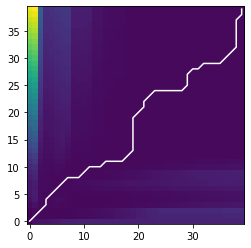

bass


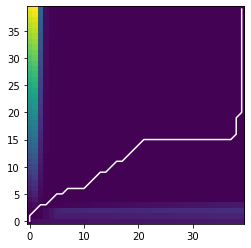

drums


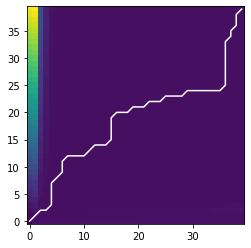

vocals


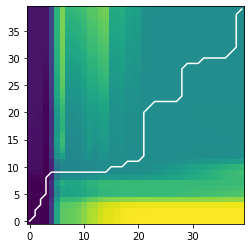

other


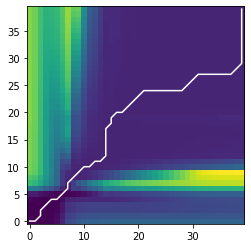

annie_lennox+Medusa+03-A_Whiter_Shade_Of_Pale.mp3 vs procol_harum+Greatest_Hits+2-A_Whiter_Shade_Of_Pale.mp3



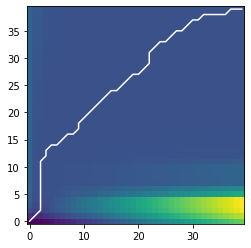

bass


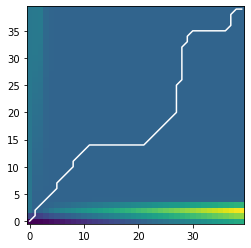

drums


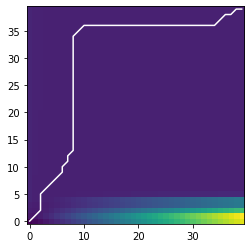

vocals


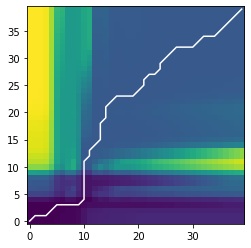

other


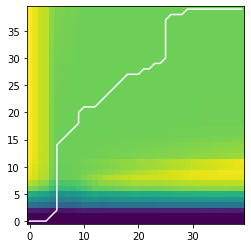

steve_miller_band+Steve_Miller_Band_Live_+09-Abracadabra.mp3 vs sugar_ray+14_59+11-Abracadabra.mp3



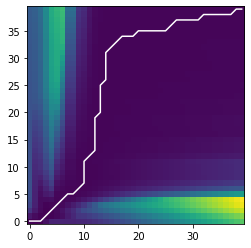

bass


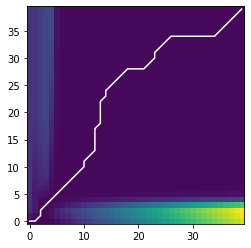

drums


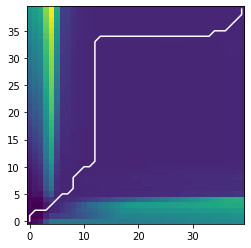

vocals


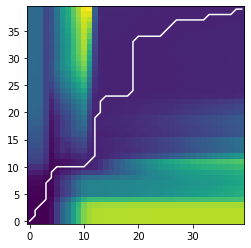

other


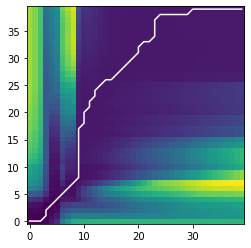

robert_palmer+Riptide+03-Addicted_To_Love.mp3 vs tina_turner+Tina_Live_In_Europe_CD_1_+09-Addicted_To_Love.mp3



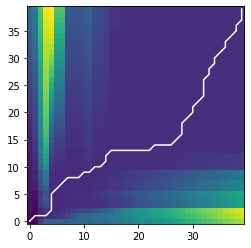

bass


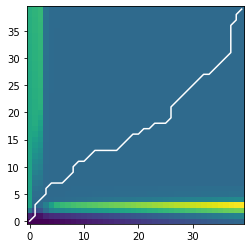

drums


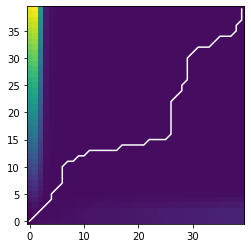

vocals


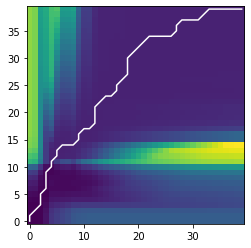

other


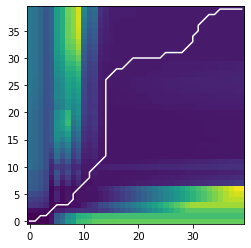

velvet_underground+Andy_Warhol_with_Nico_+06-All_Tomorrow_s_Parties.mp3 vs japan+Quiet_Life+06-All_Tomorrow_s_Parties.mp3



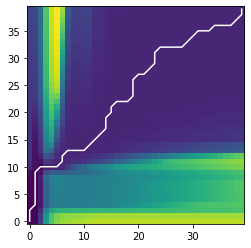

bass


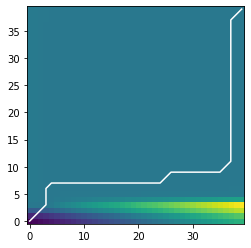

drums


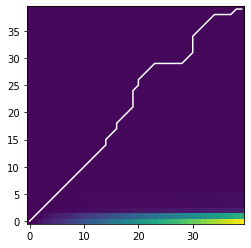

vocals


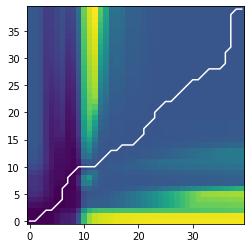

other


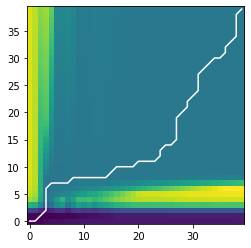

simon_and_garfunkel+Bookends+03-America.mp3 vs paul_simon+Concert_in_the_Park_Disc_2+09-America.mp3



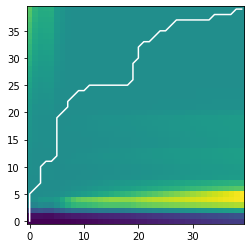

bass


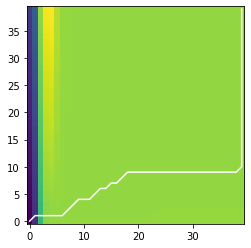

drums


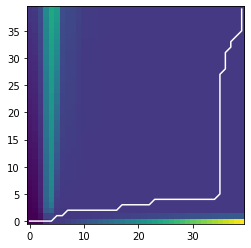

vocals


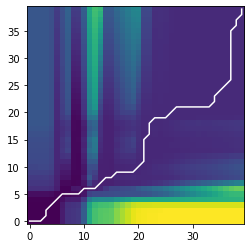

other


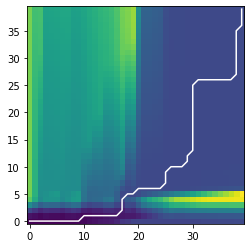

eric_clapton+Unplugged+02-Before_You_Accuse_Me.mp3 vs creedence_clearwater_revival+Cosmo_s_Factory+02-Before_You_Accuse_Me.mp3



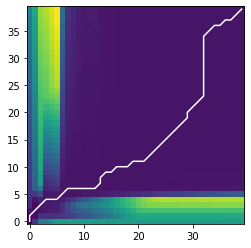

bass


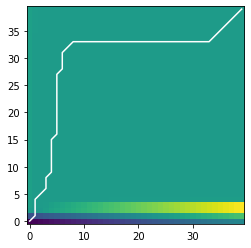

drums


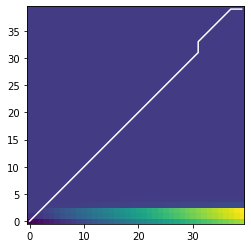

vocals


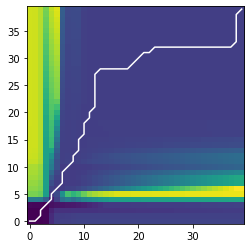

other


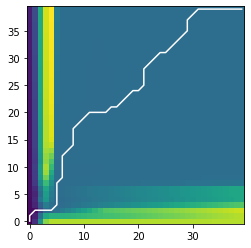

glen_phillips+Capitol_Garage+35-Between_The_Bars.mp3 vs elliott_smith+Either_Or+04-Between_The_Bars.mp3



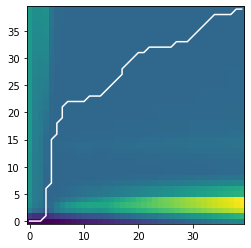

bass


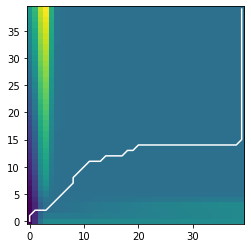

drums


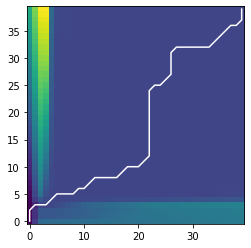

vocals


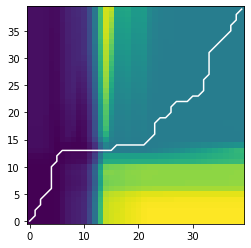

other


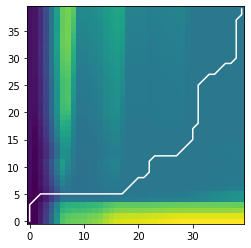

styx+Caught_In_The_Act_Disc_2_of_2_+02-Blue_Collar_Man_Long_Nights_.mp3 vs reo_speedwagon+Arch_Allies_Disc_1+01-Blue_Collar_Man.mp3



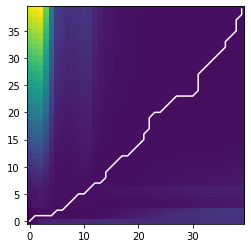

bass


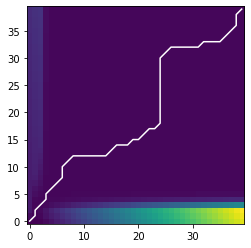

drums


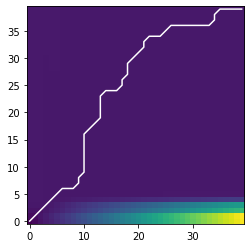

vocals


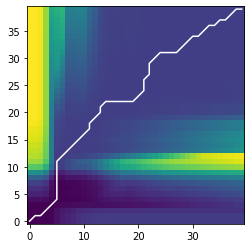

other


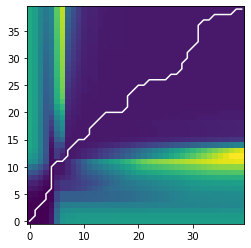

brian_wilson+Brian_Wilson_Live_at_the_Roxy_Theater_Disc_2_+11-Caroline_No.mp3 vs beach_boys+Pet_Sounds+13-Caroline_No.mp3



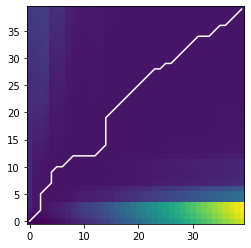

bass


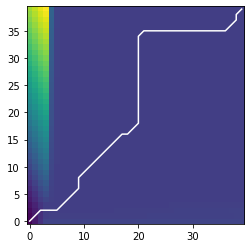

drums


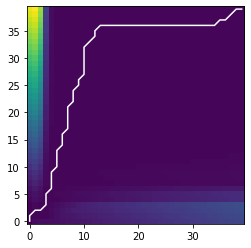

vocals


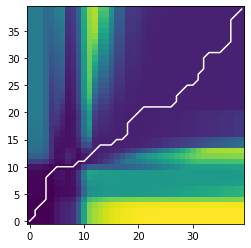

other


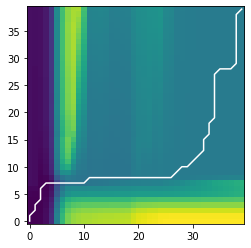

simon_and_garfunkel+Collected_Works_-_Disc_3+03-Cecilia.mp3 vs paul_simon+Concert_in_the_Park_Disc_2+11-Cecilia.mp3



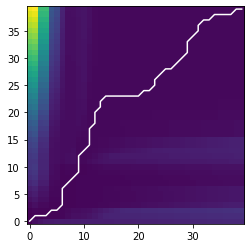

bass


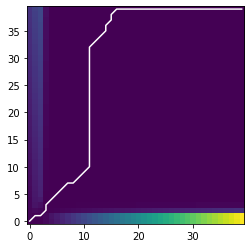

drums


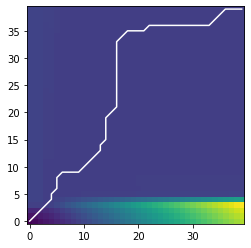

vocals


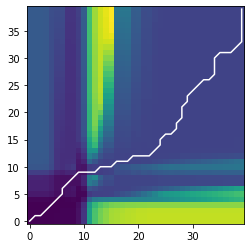

other


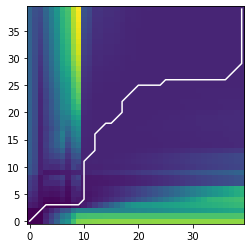

roy_orbison+Black_and_White_Night+15-Claudette.mp3 vs everly_brothers+The_Fabulous_Style_of+01-Claudette.mp3



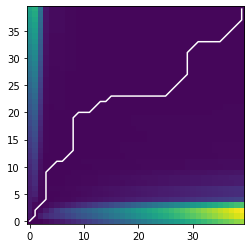

bass


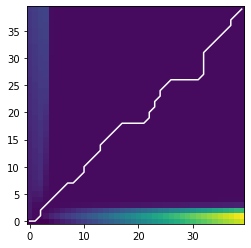

drums


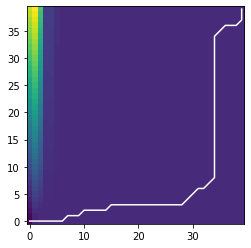

vocals


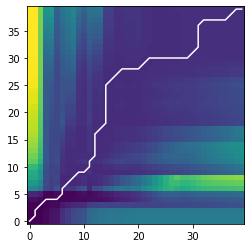

other


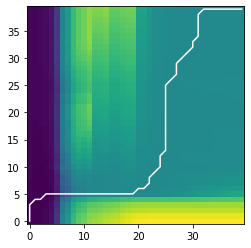

nazareth+_Snaz+08-Cocaine.mp3 vs eric_clapton+Crossroads_2_Disc_3+07-Cocaine.mp3



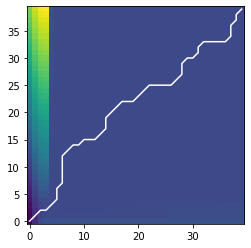

bass


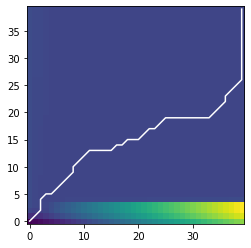

drums


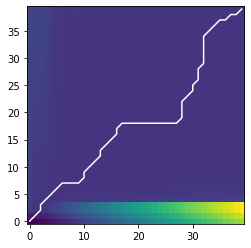

vocals


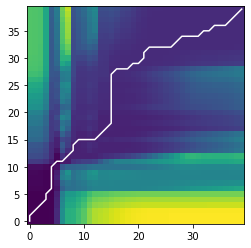

other


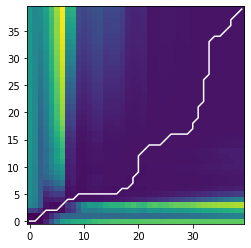

beatles+1+25-Come_Together.mp3 vs aerosmith+Live_Bootleg+06-Come_Together.mp3



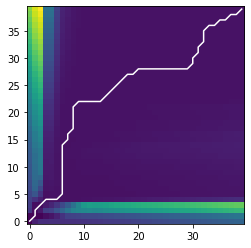

bass


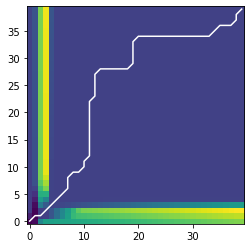

drums


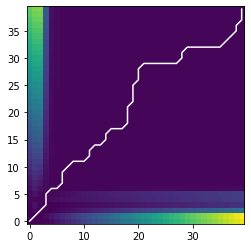

vocals


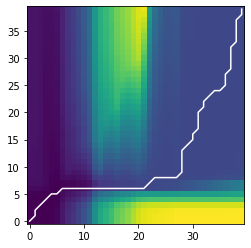

other


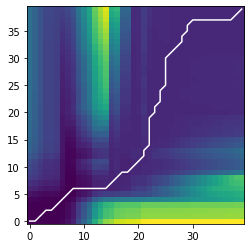

cheap_trick+Silver+13-Day_Tripper.mp3 vs beatles+1+12-Day_Tripper.mp3



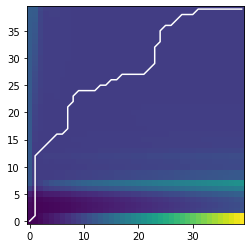

bass


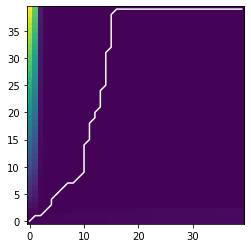

drums


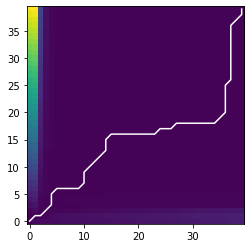

vocals


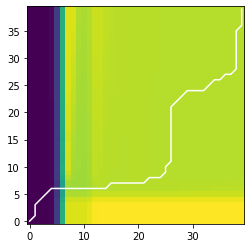

other


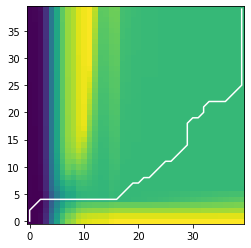

neil_young+After_the_Goldrush+07-Don_t_Let_It_Bring_You_Down.mp3 vs annie_lennox+Medusa+04-Don_t_Let_It_Bring_You_Down.mp3



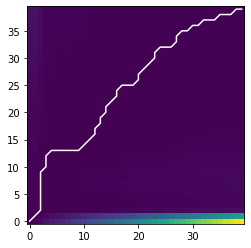

bass


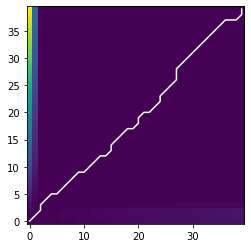

drums


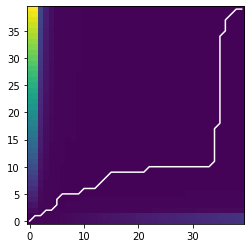

vocals


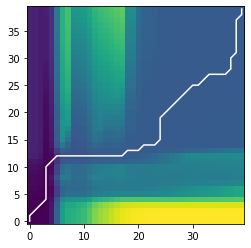

other


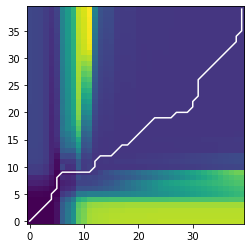

blue_nile+Hats+02-Downtown_Lights.mp3 vs annie_lennox+Medusa+07-Downtown_Lights.mp3



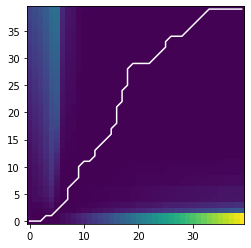

bass


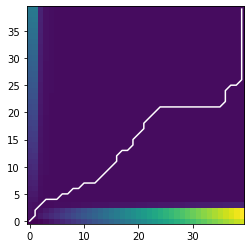

drums


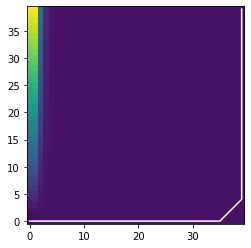

vocals


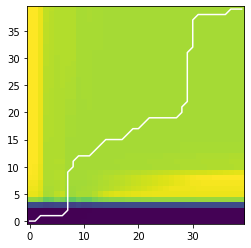

other


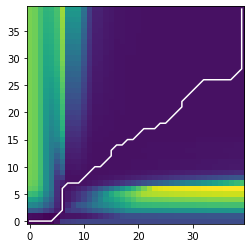

tori_amos+Strange_Little_Girls+04-Enjoy_the_Silence.mp3 vs depeche_mode+Violator+06-Enjoy_The_Silence.mp3



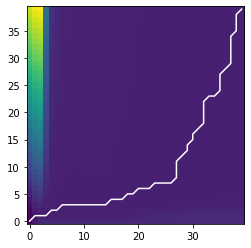

bass


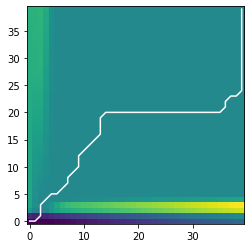

drums


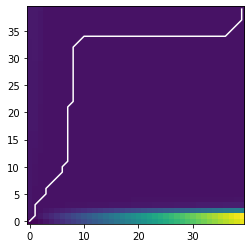

vocals


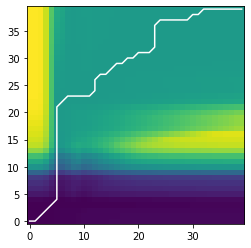

other


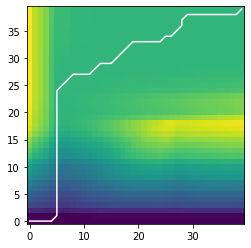

limp_bizkit+Three_Dollar_Bill_Yall+09-Faith.mp3 vs george_michael+Faith+01-Faith.mp3



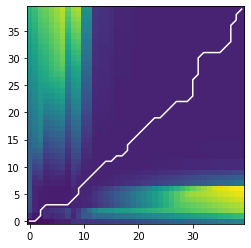

bass


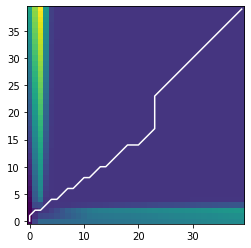

drums


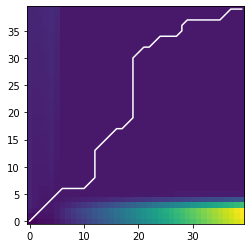

vocals


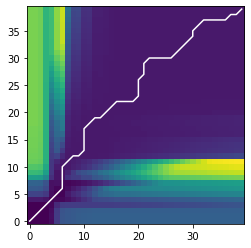

other


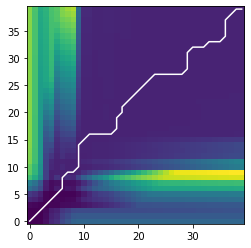

brian_wilson+Brian_Wilson_Live_at_the_Roxy_Theater_Disc_2_+07-God_Only_Knows.mp3 vs beach_boys+Pet_Sounds+08-God_Only_Knows.mp3



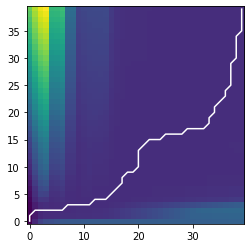

bass


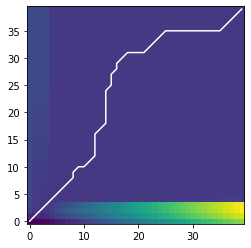

drums


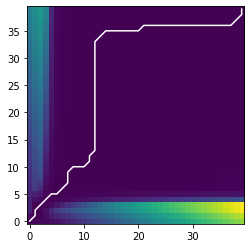

vocals


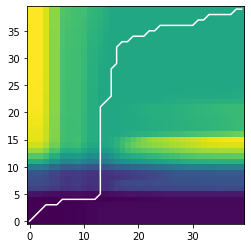

other


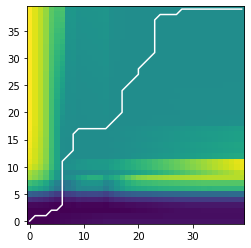

sheryl_crow+Live_from_Central_Park+07-Gold_Dust_Woman.mp3 vs fleetwood_mac+Rumours+11-Gold_Dust_Woman.mp3



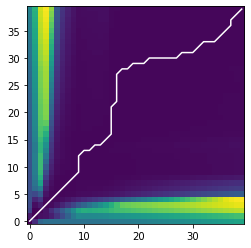

bass


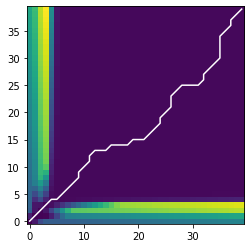

drums


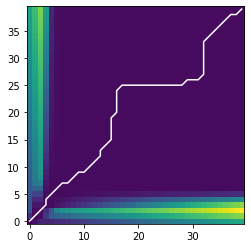

vocals


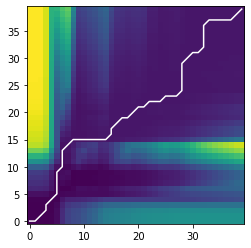

other


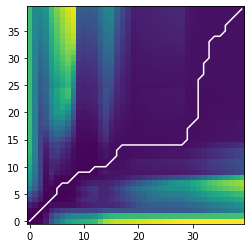

styx+Return_To_Paradise_Disc_2+01-Grand_Illusion.mp3 vs reo_speedwagon+Arch_Allies_Disc_1+02-Grand_Illusion.mp3



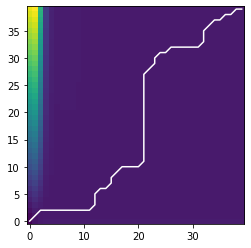

bass


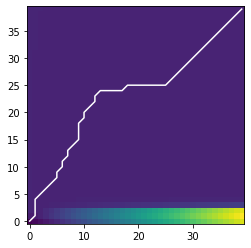

drums


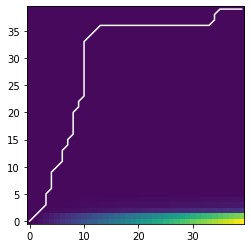

vocals


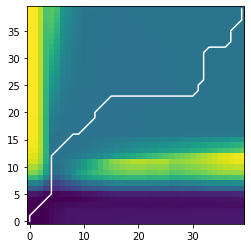

other


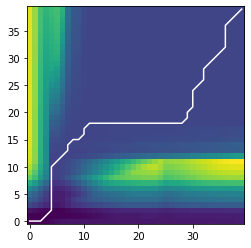

tori_amos+Strange_Little_Girls+10-Happiness_is_a_Warm_Gun.mp3 vs beatles+White_Album_Disc_1+08-Happiness_is_a_Warm_Gun.mp3



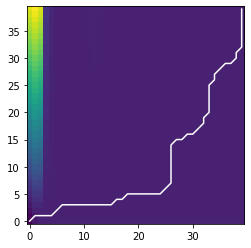

bass


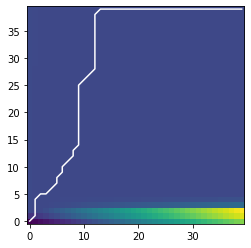

drums


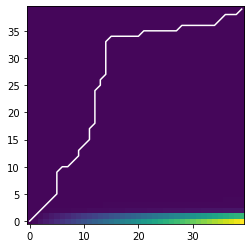

vocals


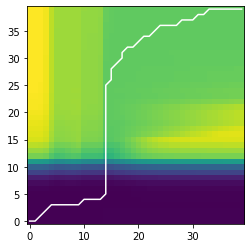

other


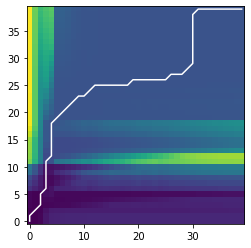

tori_amos+Strange_Little_Girls+08-Heart_Of_Gold.mp3 vs neil_young+Harvest+04-Heart_Of_Gold.mp3



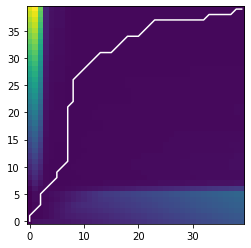

bass


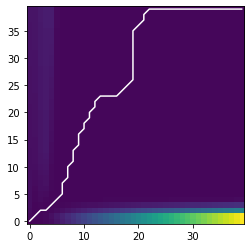

drums


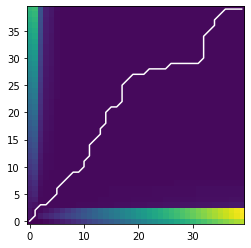

vocals


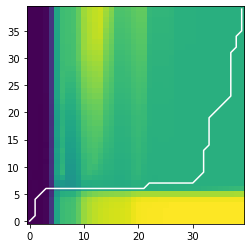

other


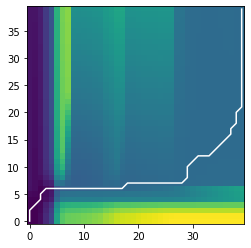

milli_vanilli+All_Or_Nothing+12-Hush.mp3 vs deep_purple+Nobody_s_Perfect_Disc_2_2_+07-Hush.mp3



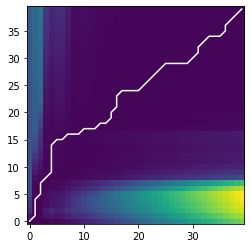

bass


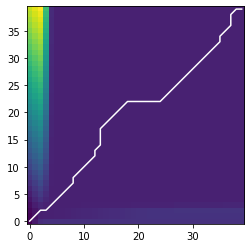

drums


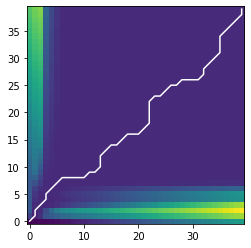

vocals


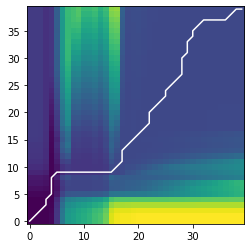

other


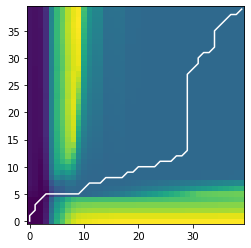

temptations+The_Temptations_The_Ultimate_Collection+14-I_Can_t_Get_Next_To_You.mp3 vs annie_lennox+Medusa+06-I_Can_t_Get_Next_To_You.mp3



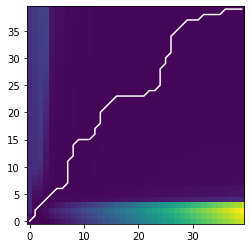

bass


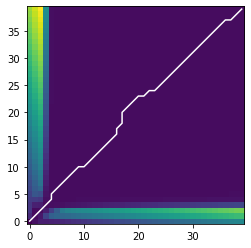

drums


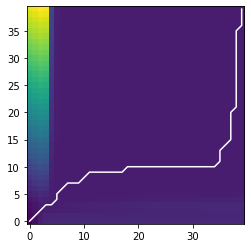

vocals


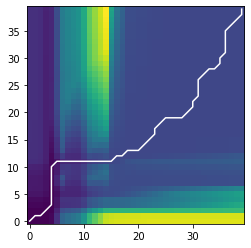

other


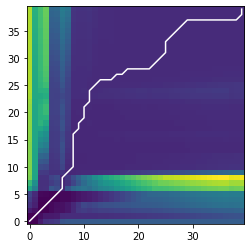

rolling_stones+Big_Hits+01-_I_Can_t_Get_No_Satisfaction.mp3 vs britney_spears+Oops_I_Did_It_Again+04-_I_Can_t_Get_No_Satisfaction.mp3



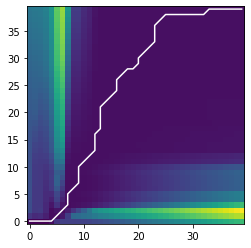

bass


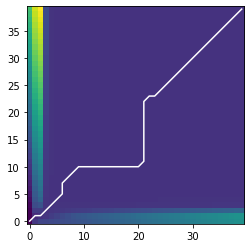

drums


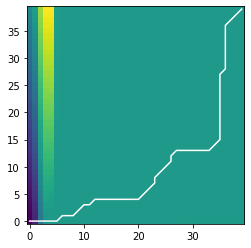

vocals


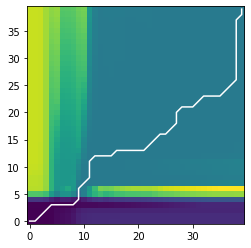

other


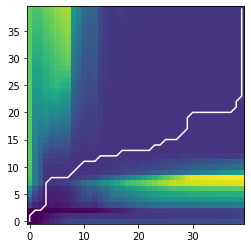

tori_amos+Strange_Little_Girls+09-I_Don_t_Like_Mondays.mp3 vs boomtown_rats+Best_of_the_Boomtown_Rats+10-I_Don_t_Like_Mondays.mp3



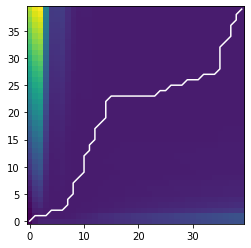

bass


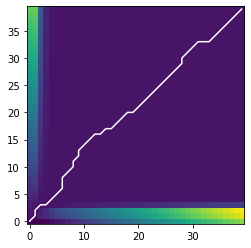

drums


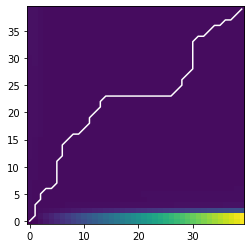

vocals


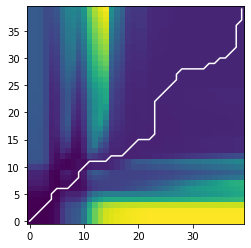

other


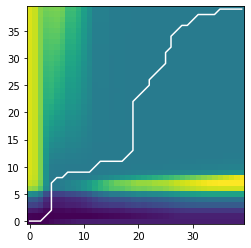

new_found_glory+From_the_Screen_to_Your_Stereo+03-I_Don_t_Want_To_Miss_A_Thing.mp3 vs aerosmith+Armageddon_Original_Soundtrack_+01-I_Don_t_Want_To_Miss_A_Thing.mp3



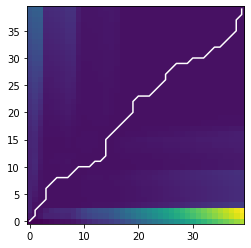

bass


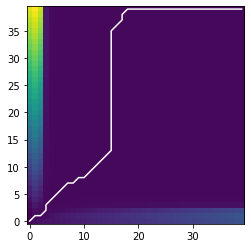

drums


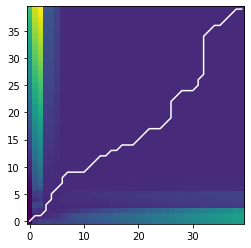

vocals


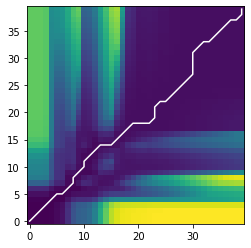

other


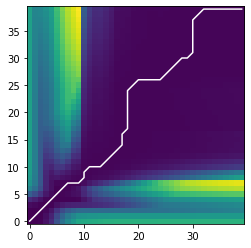

faith_hill+Faith+10-I_Love_You.mp3 vs celine_dion+Falling_Into_You+09-I_Love_You.mp3



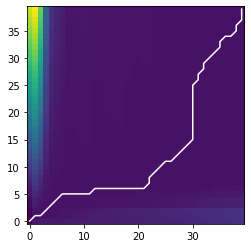

bass


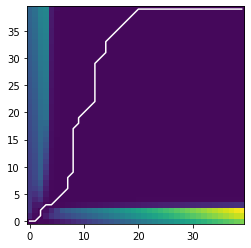

drums


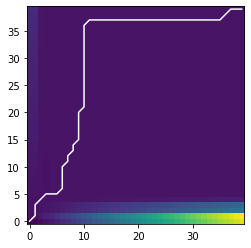

vocals


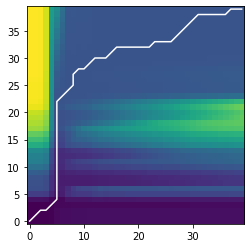

other


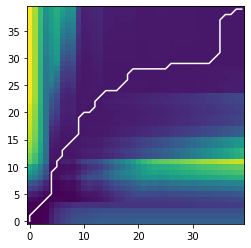

john_lennon+Double_Fantasy+05-I_m_Losing_You.mp3 vs cheap_trick+Silver+08-I_m_Losing_You.mp3



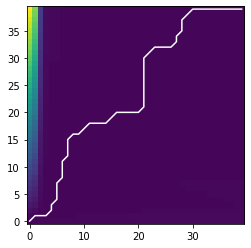

bass


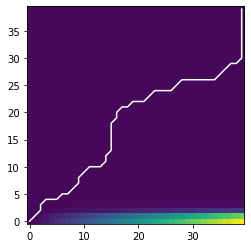

drums


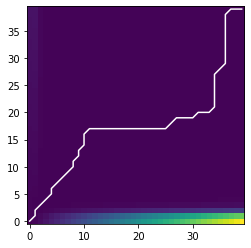

vocals


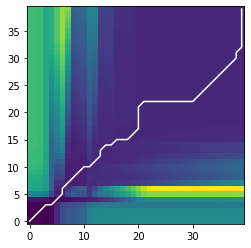

other


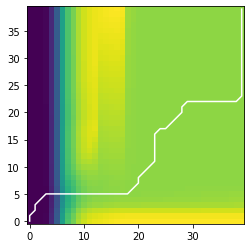

tori_amos+Strange_Little_Girls+05-I_m_Not_In_Love.mp3 vs 10cc+The_Very_Best_of_10cc+07-I_m_Not_In_Love.mp3



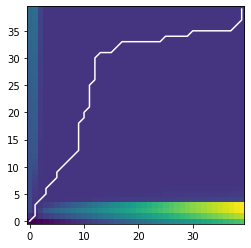

bass


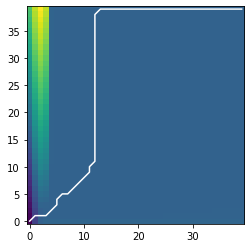

drums


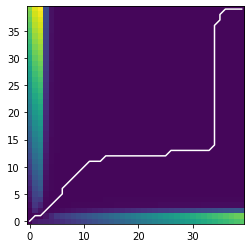

vocals


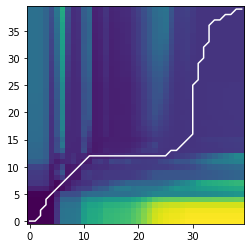

other


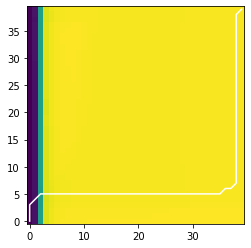

run_dmc+Raising_Hell+02-It_s_Tricky.mp3 vs bloodhound_gang+One_Fierce_Beer_Coaster+06-It_s_Tricky.mp3



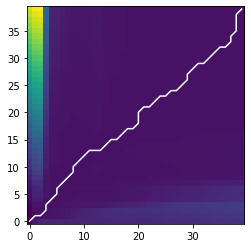

bass


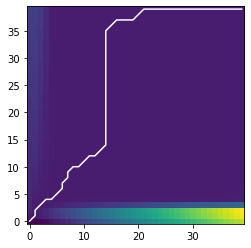

drums


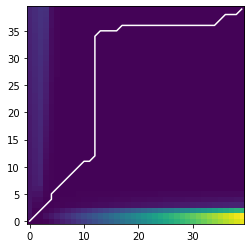

vocals


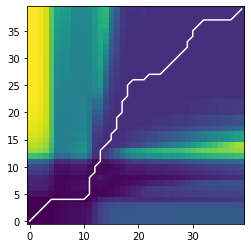

other


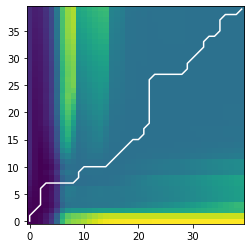

styx+Return_To_Paradise_Disc_1_+05-Lady.mp3 vs reo_speedwagon+Arch_Allies_Disc_1+04-Lady.mp3



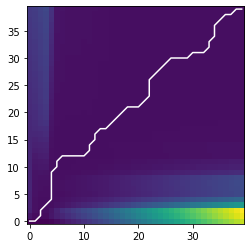

bass


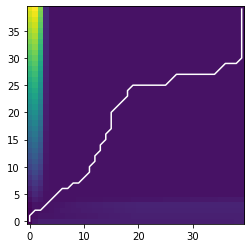

drums


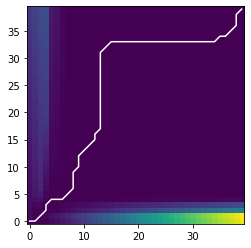

vocals


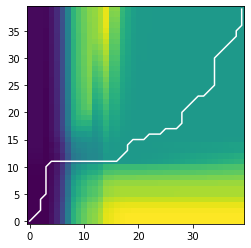

other


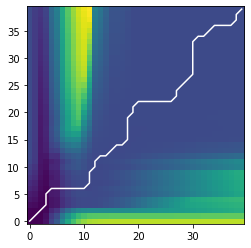

eric_clapton+Crossroads_2_Disc_1+08-Little_Wing.mp3 vs corrs+Talk_on_Corners_Special_Edition+12-Little_Wing.mp3



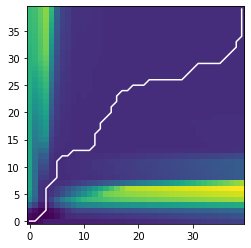

bass


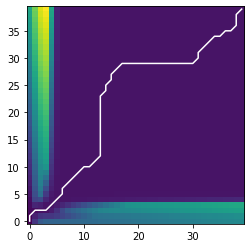

drums


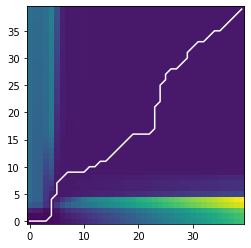

vocals


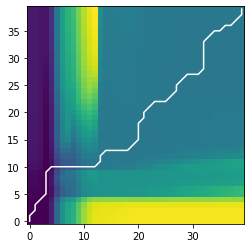

other


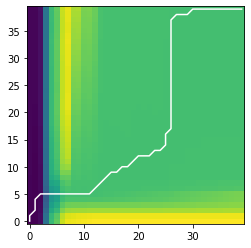

tesla+Five_Man_Acoustic_Jam+09-Lodi.mp3 vs creedence_clearwater_revival+Live_in_Europe+08-Lodi.mp3



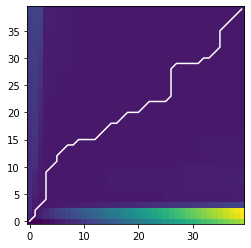

bass


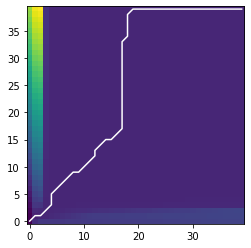

drums


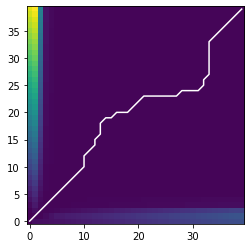

vocals


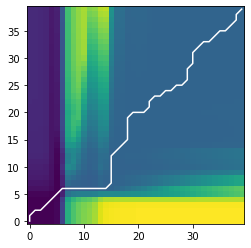

other


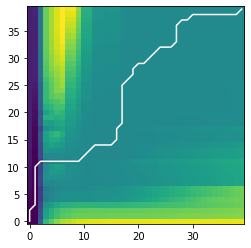

nazareth+_Snaz+15-Love_Hurts.mp3 vs heart+The_Road_Home+07-Love_Hurts.mp3



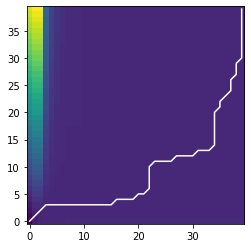

bass


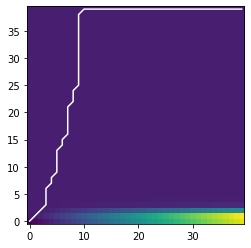

drums


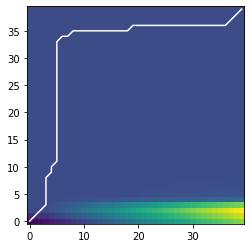

vocals


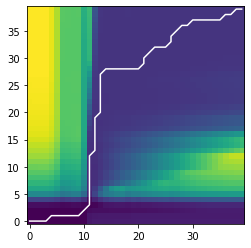

other


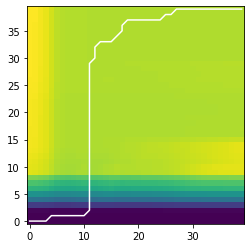

rage_against_the_machine+Renegades+12-Maggie_s_Farm.mp3 vs bob_dylan+Live_at_Budokan_Disc_1+06-Maggie_s_Farm.mp3



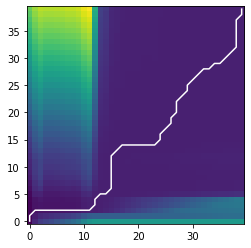

bass


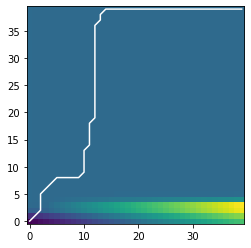

drums


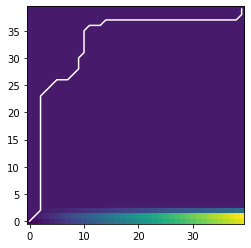

vocals


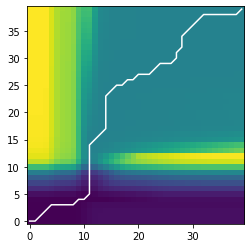

other


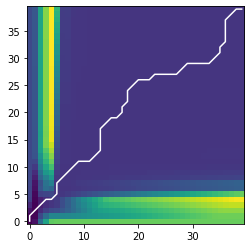

westlife+Westlife+13-More_Than_Words.mp3 vs extreme+The_Best_Of_Extreme+08-More_Than_Words.mp3



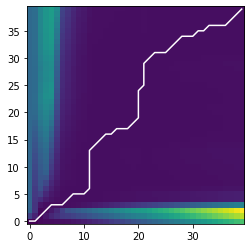

bass


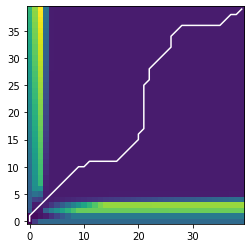

drums


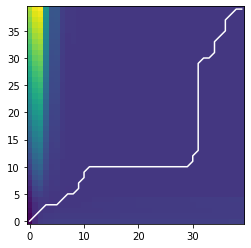

vocals


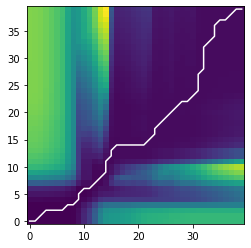

other


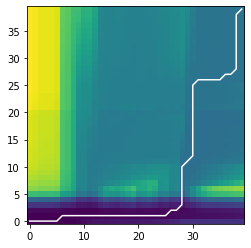

who+Who_s_Better_Who_s_Best+01-My_Generation.mp3 vs green_day+Kerplunk+16-My_Generation.mp3



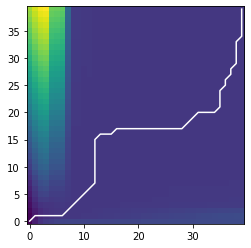

bass


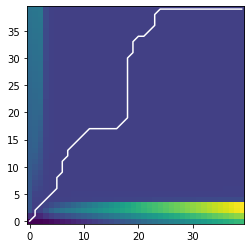

drums


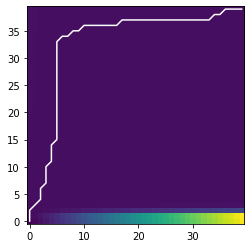

vocals


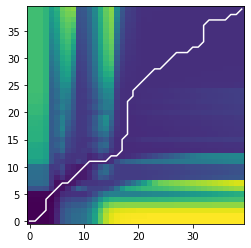

other


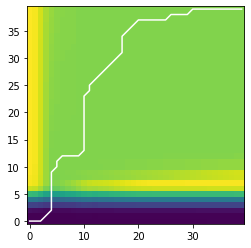

new_found_glory+From_the_Screen_to_Your_Stereo+07-My_Heart_Will_Go_On.mp3 vs celine_dion+Au_Coer_Du_Stade+11-My_Heart_Will_Go_On.mp3



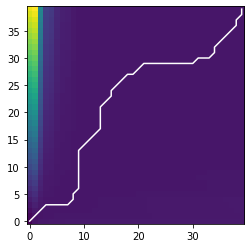

bass


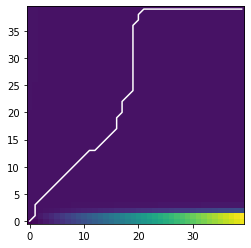

drums


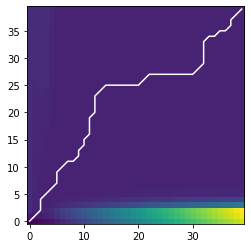

vocals


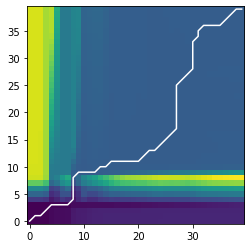

other


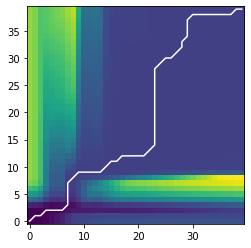

smashing_pumpkins+For_The_Masses_A_Tribute_To_Depeche_Mode+01-Never_Let_Me_Down_Again.mp3 vs depeche_mode+Music_For_The_Masses+01-Never_Let_Me_Down_Again.mp3



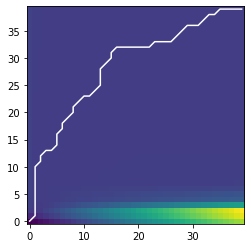

bass


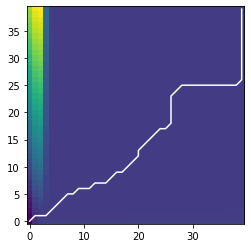

drums


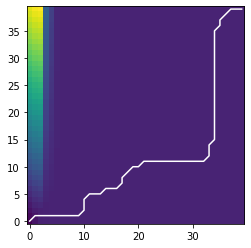

vocals


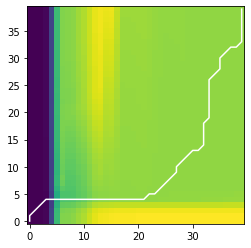

other


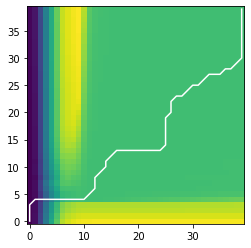

velvet_underground+Loaded+05-New_Age.mp3 vs tori_amos+Strange_Little_Girls+01-New_Age.mp3



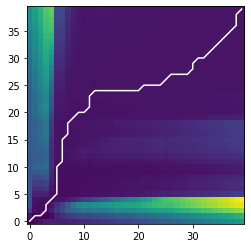

bass


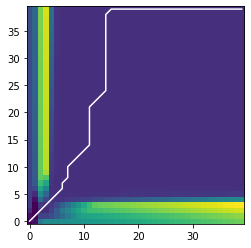

drums


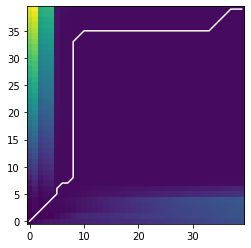

vocals


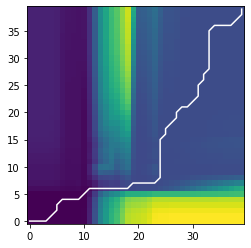

other


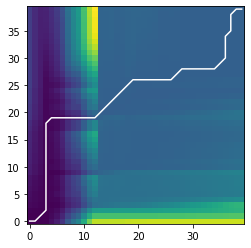

creedence_clearwater_revival+The_Concert+12-Night_Time_Is_The_Right_Time.mp3 vs aretha_franklin+Aretha_Now+04-Night_Time_Is_The_Right_Time.mp3



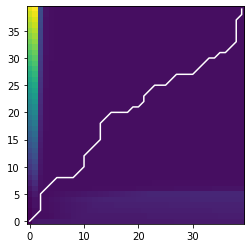

bass


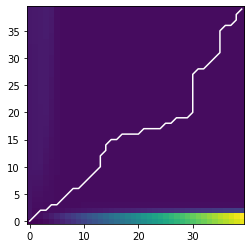

drums


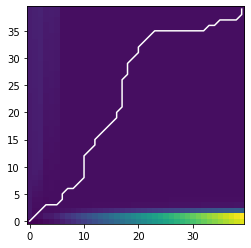

vocals


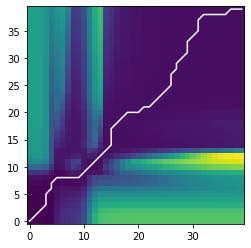

other


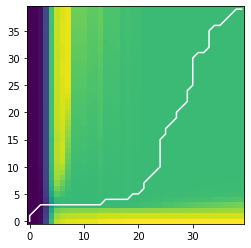

fugees+The_Score+05-No_Woman_No_Cry.mp3 vs bob_marley+Live_+05-No_Woman_No_Cry.mp3



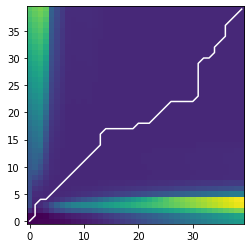

bass


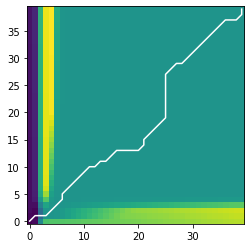

drums


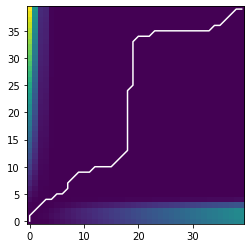

vocals


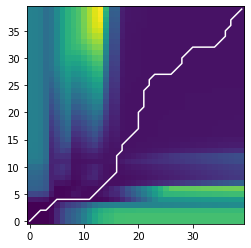

other


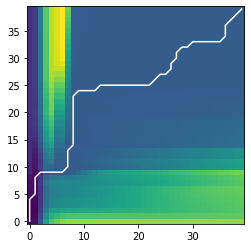

roy_orbison+Black_and_White_Night+17-Oh_Pretty_Woman.mp3 vs al_green+I_m_Still_In_Love_With_You+06-Oh_Pretty_Woman.mp3



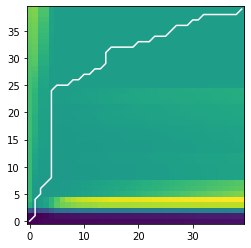

bass


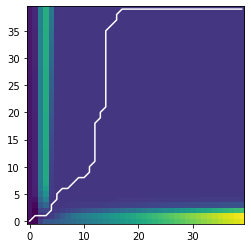

drums


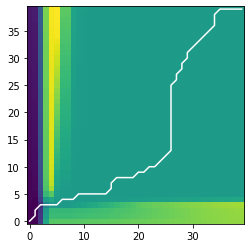

vocals


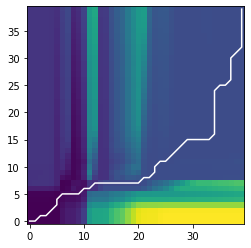

other


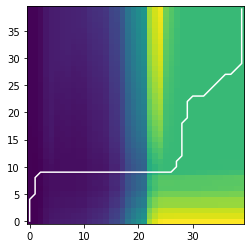

roy_orbison+Black_and_White_Night+05-Ooby_Dooby.mp3 vs creedence_clearwater_revival+Cosmo_s_Factory+04-Ooby_Dooby.mp3



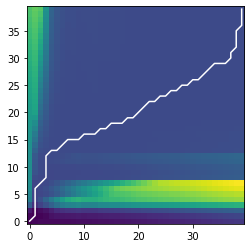

bass


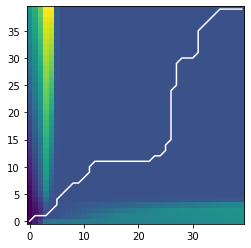

drums


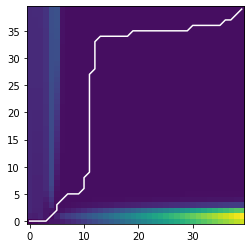

vocals


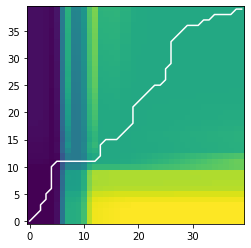

other


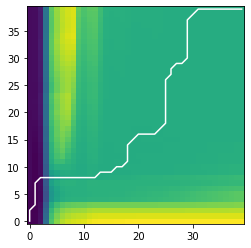

tina_turner+Tina_Live_In_Europe_CD_2_+07-Proud_Mary.mp3 vs creedence_clearwater_revival+Live_in_Europe+10-Proud_Mary.mp3



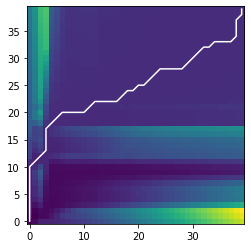

bass


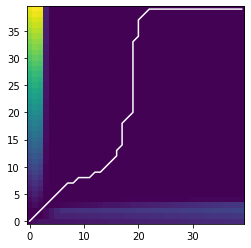

drums


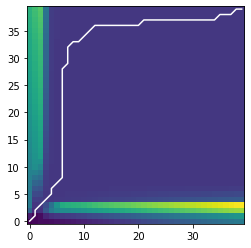

vocals


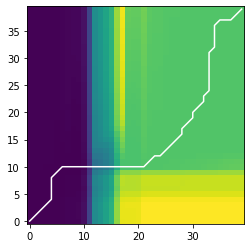

other


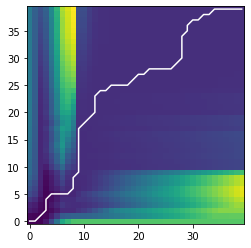

prince+Purple_Rain+09-Purple_Rain.mp3 vs leann_rimes+Sittin_On_Top_Of_The_World+15-Purple_Rain.mp3



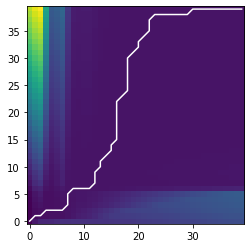

bass


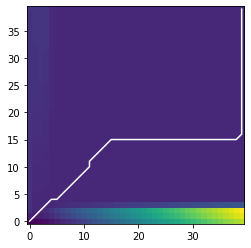

drums


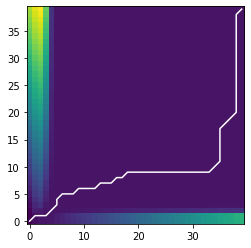

vocals


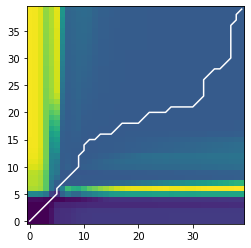

other


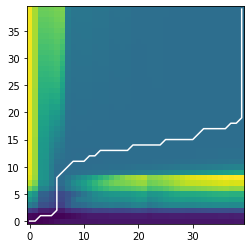

tori_amos+Strange_Little_Girls+06-Rattlesnakes.mp3 vs lloyd_cole_and_the_commotions+Rattlesnakes+03-Rattlesnakes.mp3



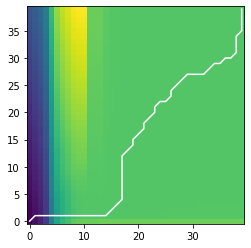

bass


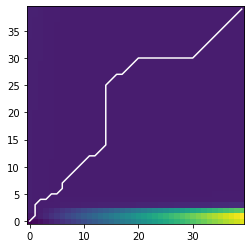

drums


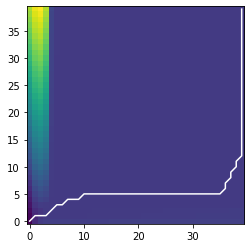

vocals


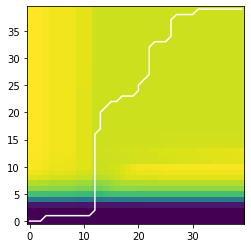

other


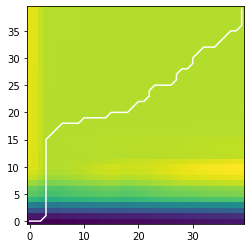

tori_amos+Strange_Little_Girls+12-Real_Men.mp3 vs joe_jackson+Night_and_Day+08-Real_Men.mp3



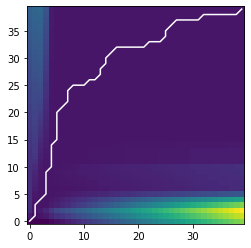

bass


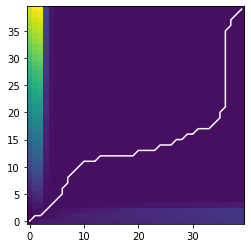

drums


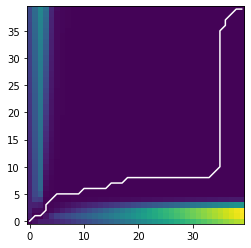

vocals


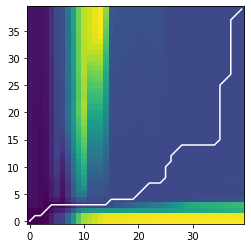

other


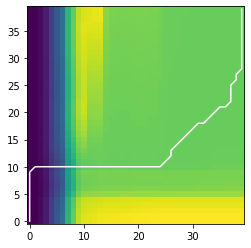

ub40+Labour_of_Love+06-Red_Red_Wine.mp3 vs neil_diamond+Hot_August_Night_Disc_1+10-Red_Red_Wine.mp3



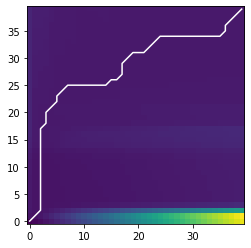

bass


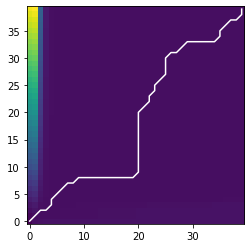

drums


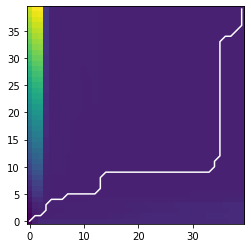

vocals


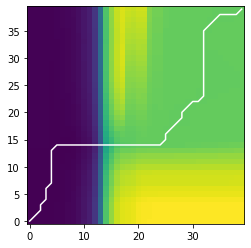

other


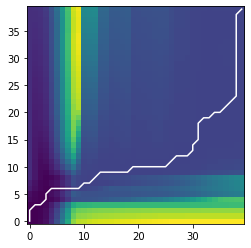

tina_turner+Tina_Live_In_Europe_CD_2_+05-River_Deep_Mountain_High.mp3 vs celine_dion+Falling_Into_You+12-River_Deep_Mountain_High.mp3



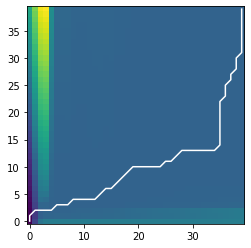

bass


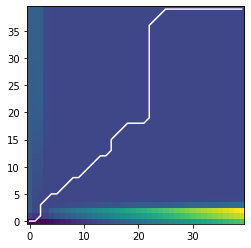

drums


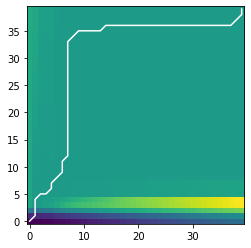

vocals


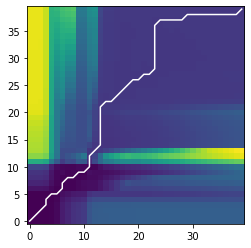

other


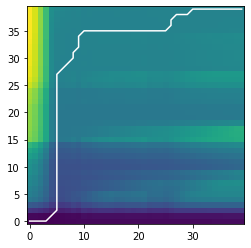

big_star+Radio_City+10-September_Gurls.mp3 vs bangles+Different_Light+09-September_Gurls.mp3



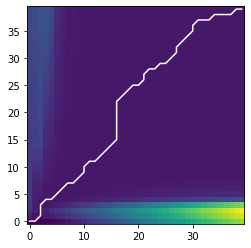

bass


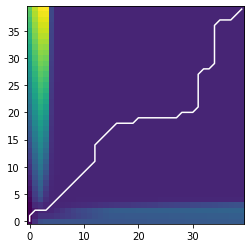

drums


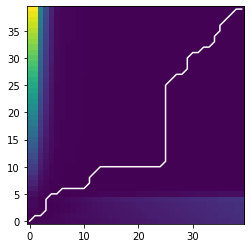

vocals


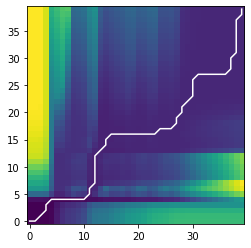

other


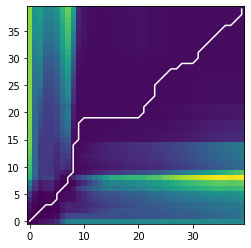

joe_cocker+Joe_Cocker_Live+12-She_Came_In_Through_The_Bathroom_Window.mp3 vs beatles+Abbey_Road+13-She_Came_In_Through_The_Bathroom_Window.mp3



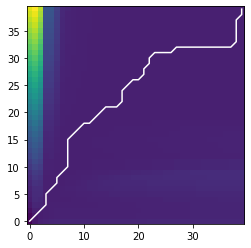

bass


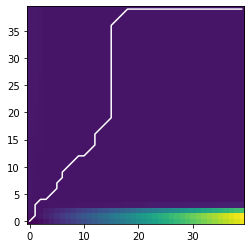

drums


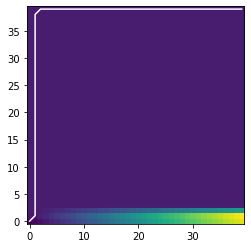

vocals


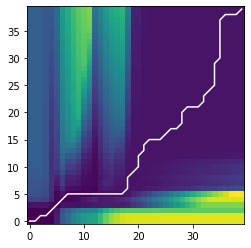

other


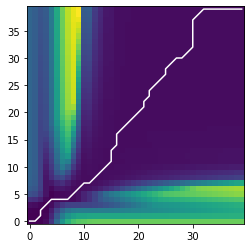

paul_simon+There_Goes_Rhymin_Simon+04-Something_So_Right.mp3 vs annie_lennox+Medusa+10-Something_So_Right.mp3



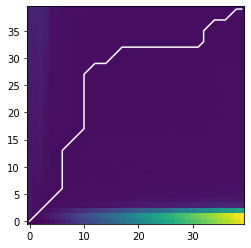

bass


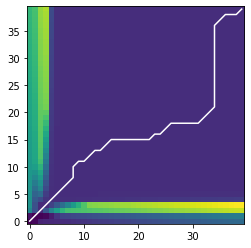

drums


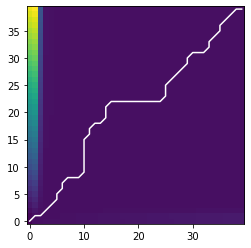

vocals


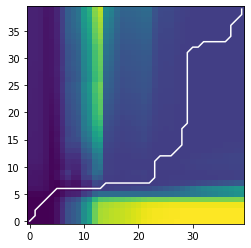

other


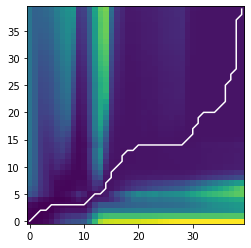

queen+Sheer_Heart_Attack+08-Stone_Cold_Crazy.mp3 vs metallica+Live_Shit_Binge_And_Purge_Disc_3_+09-Stone_Cold_Crazy.mp3



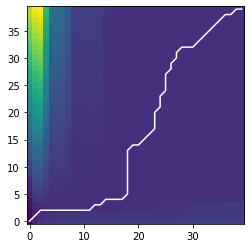

bass


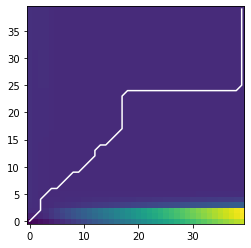

drums


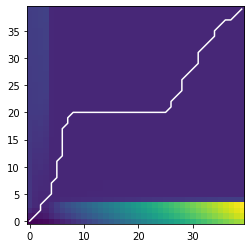

vocals


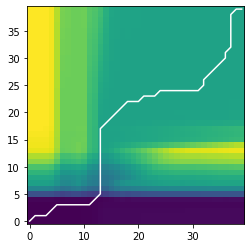

other


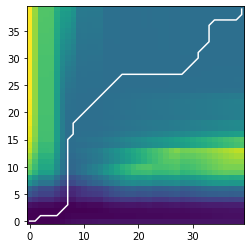

bryan_adams+So_Far_So_Good+02-Straight_From_The_Heart.mp3 vs bonnie_tyler+Faster_Than_The_Speed_Of_Night+09-Straight_From_The_Heart.mp3



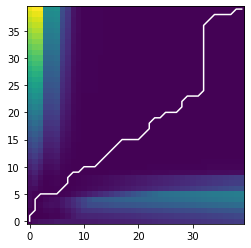

bass


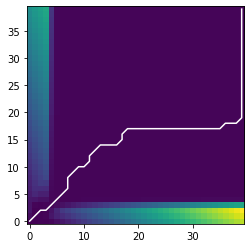

drums


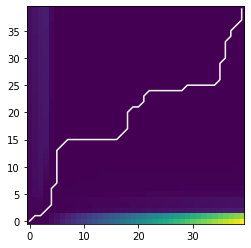

vocals


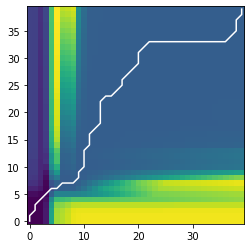

other


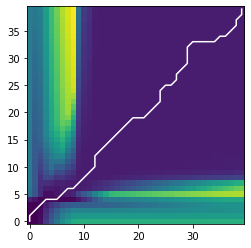

tori_amos+Strange_Little_Girls+03-Strange_Little_Girl.mp3 vs stranglers+The_UA_Singles_79-82+24-Strange_Little_Girl.mp3



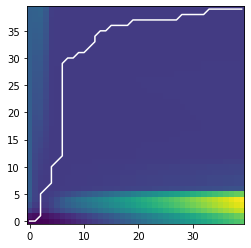

bass


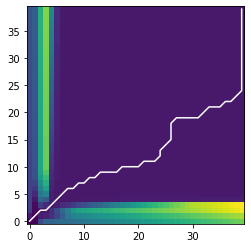

drums


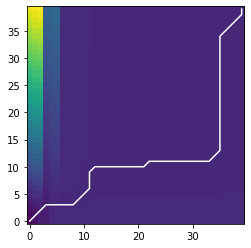

vocals


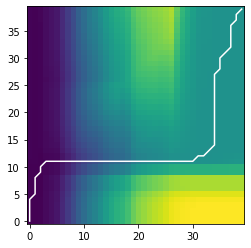

other


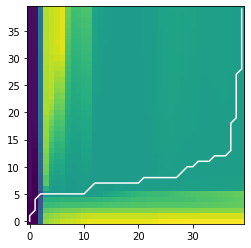

rolling_stones+Get_Yer_Ya-Ya_s_Out_+10-Street_Fighting_Man.mp3 vs rage_against_the_machine+Renegades+11-Street_Fighting_Man.mp3



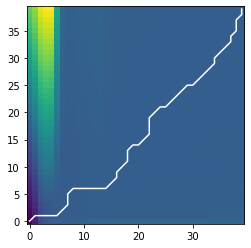

bass


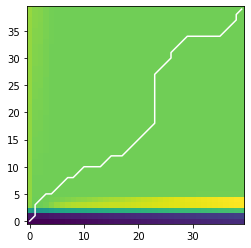

drums


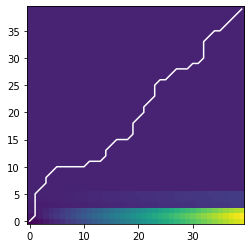

vocals


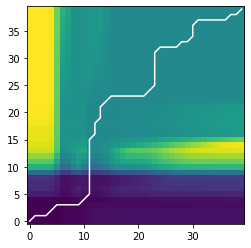

other


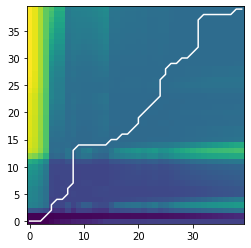

mxpx+On_The_Cover+01-Summer_of_69.mp3 vs bryan_adams+Live_Live_Live_+13-Summer_of_69.mp3



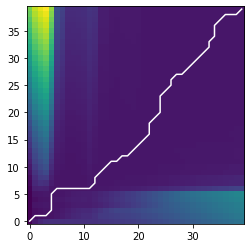

bass


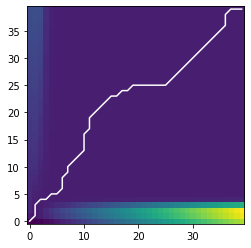

drums


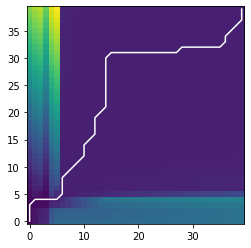

vocals


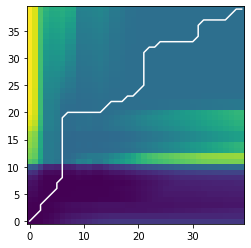

other


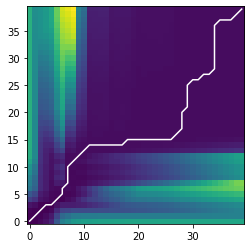

beach_boys+Surfin_USA_Surfin_Safari+09-Summertime_Blues.mp3 vs alan_jackson+Who_I_Am+01-Summertime_Blues.mp3



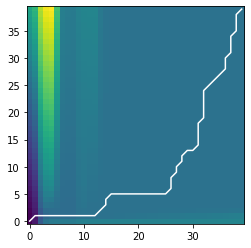

bass


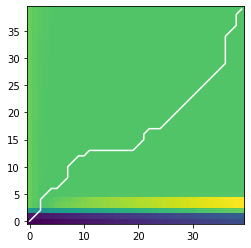

drums


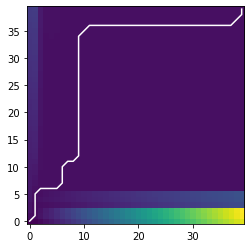

vocals


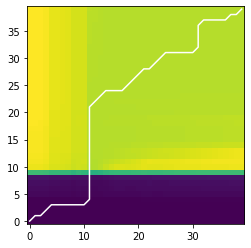

other


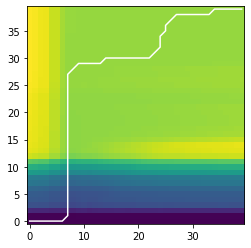

mxpx+On_The_Cover+05-Take_On_Me.mp3 vs a_ha+Hunting_High_and_Low+01-Take_On_Me.mp3



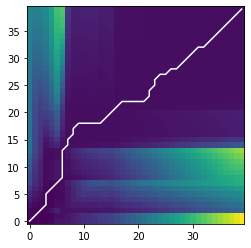

bass


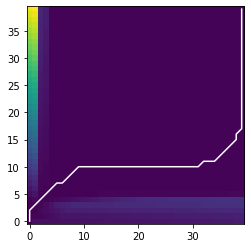

drums


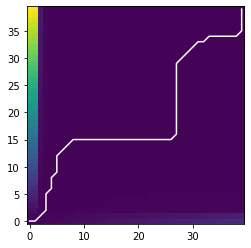

vocals


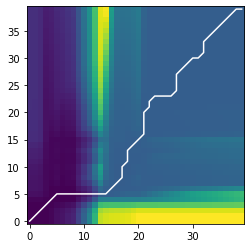

other


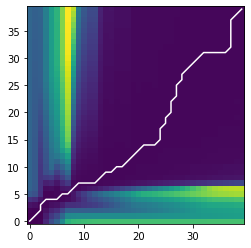

simon_and_garfunkel+Collected_Works_Disc_3+06-The_Boxer.mp3 vs paul_simon+Concert_in_the_Park_Disc_2+10-The_Boxer.mp3



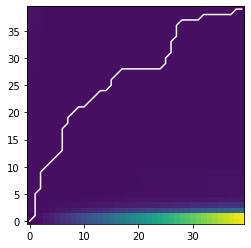

bass


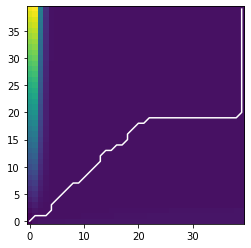

drums


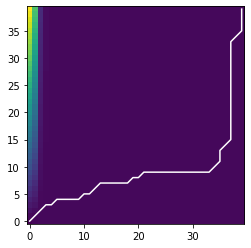

vocals


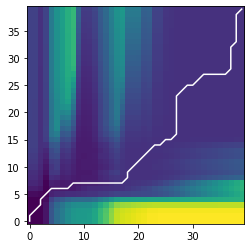

other


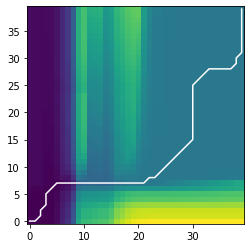

persuaders+Thin_Line_Between_Love_Hate_Golden_Classics+01-Thin_Line_Between_Love_And_Hate.mp3 vs annie_lennox+Medusa+08-Thin_Line_Between_Love_And_Hate.mp3



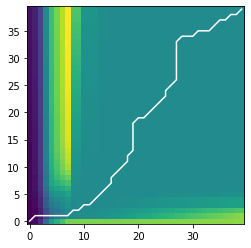

bass


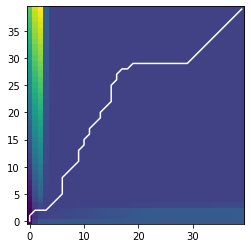

drums


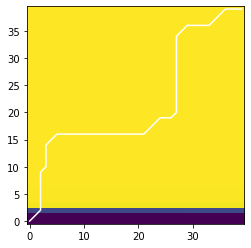

vocals


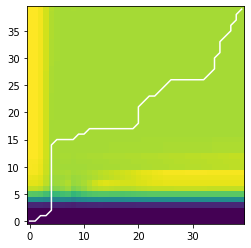

other


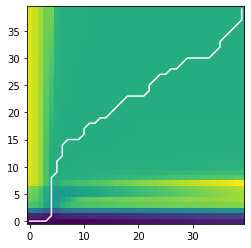

tori_amos+Strange_Little_Girls+07-Time.mp3 vs tom_waits+Rain_Dogs+09-Time.mp3



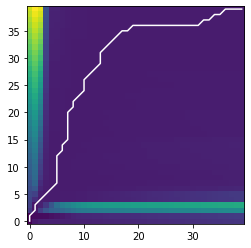

bass


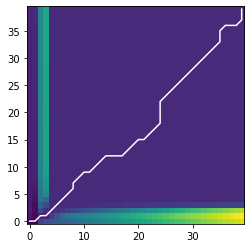

drums


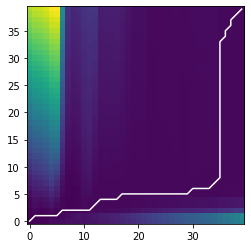

vocals


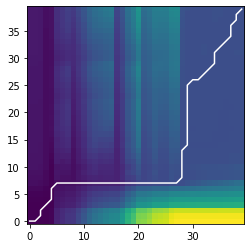

other


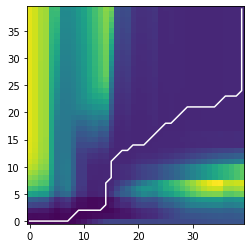

phil_collins+Face_Value_+12-Tomorrow_Never_Knows.mp3 vs beatles+Revolver+14-Tomorrow_Never_Knows.mp3



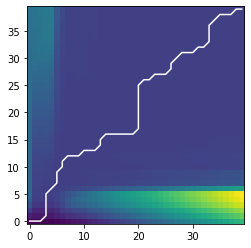

bass


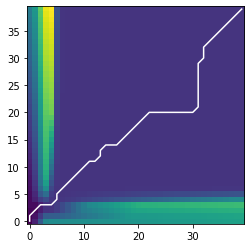

drums


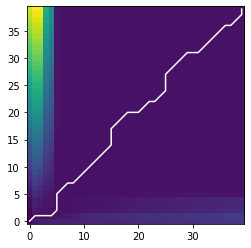

vocals


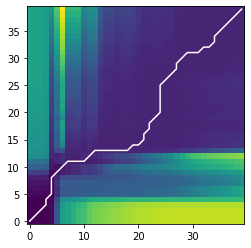

other


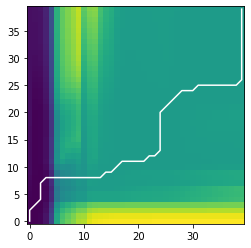

rem+Dead_Letter_Office+07-Toys_In_The_Attic.mp3 vs aerosmith+Toys_In_The_Attic+01-Toys_In_The_Attic.mp3



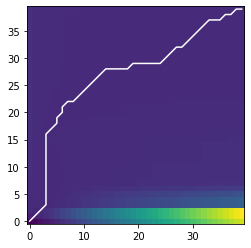

bass


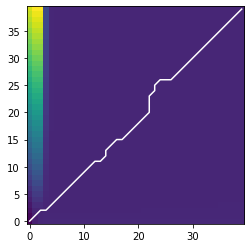

drums


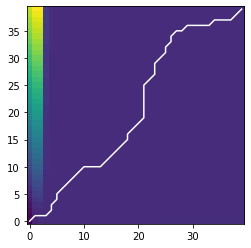

vocals


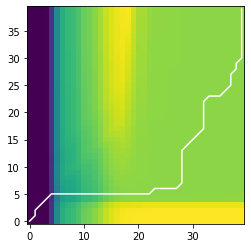

other


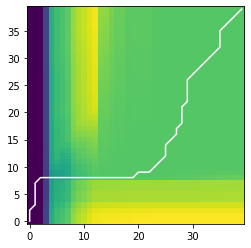

clash+London_Calling+19-Train_In_Vain.mp3 vs annie_lennox+Medusa+05-Train_In_Vain.mp3



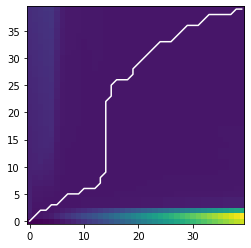

bass


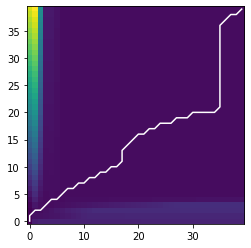

drums


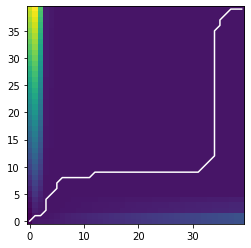

vocals


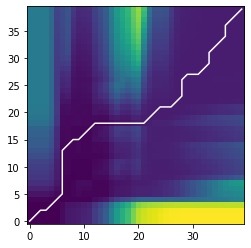

other


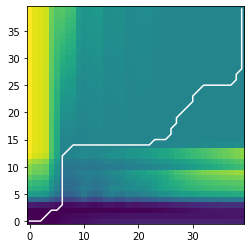

zz_top+Fandango+09-Tush.mp3 vs nazareth+_Snaz+16-Tush.mp3



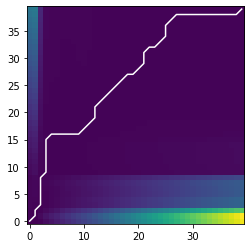

bass


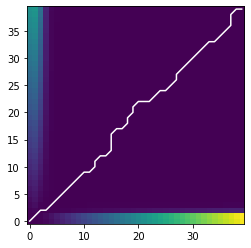

drums


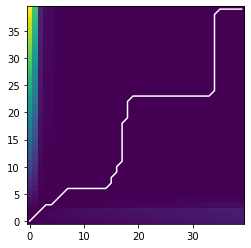

vocals


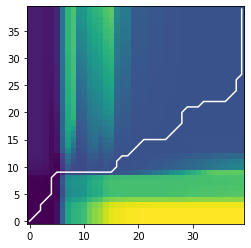

other


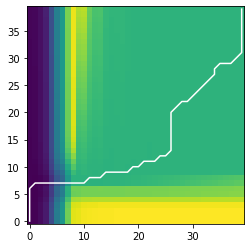

bob_marley_the_wailers+Legend+10-Waiting_in_Vain.mp3 vs annie_lennox+Medusa+09-Waiting_In_Vain.mp3



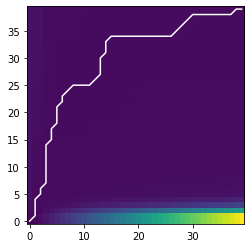

bass


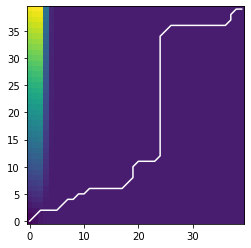

drums


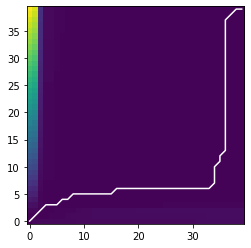

vocals


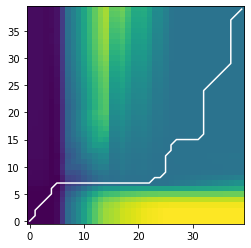

other


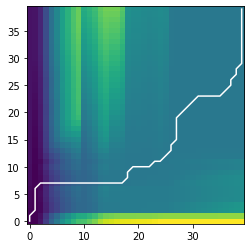

run_dmc+Raising_Hell+04-Walk_This_Way.mp3 vs aerosmith+A_Little_South_Of_Sanity_Disc_2_+08-Walk_This_Way.mp3



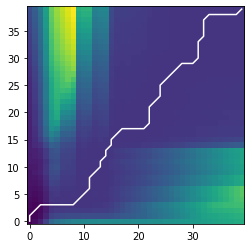

bass


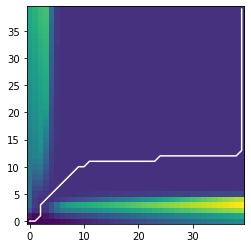

drums


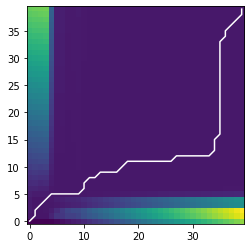

vocals


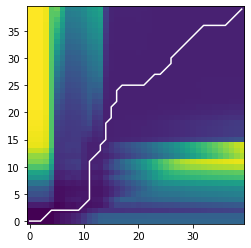

other


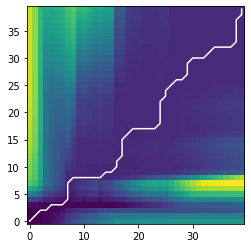

garth_brooks+The_Chase+05-Walking_After_Midnight.mp3 vs bryan_adams+Live_Live_Live_+15-Walking_After_Midnight.mp3



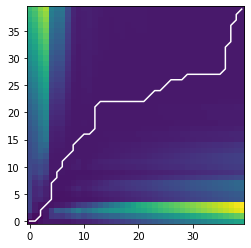

bass


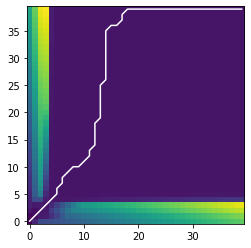

drums


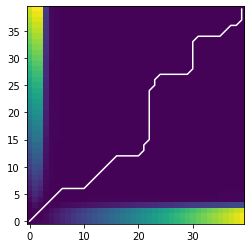

vocals


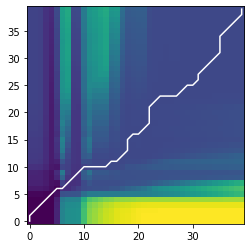

other


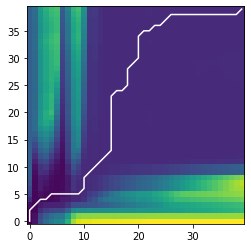

tesla+Five_Man_Acoustical_Jam+04-We_Can_Work_It_Out.mp3 vs beatles+1+13-We_Can_Work_It_Out.mp3



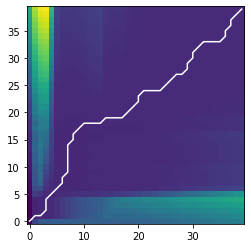

bass


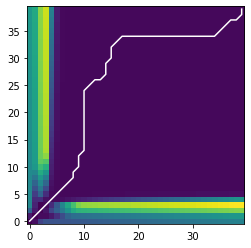

drums


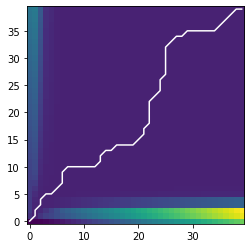

vocals


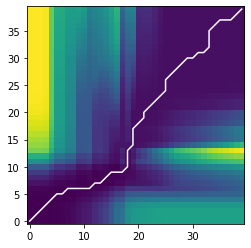

other


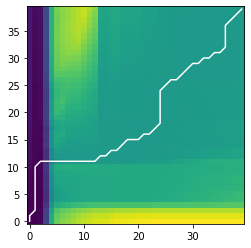

marvin_gaye+Live+12-What_s_Going_On.mp3 vs cyndi_lauper+Twelve_Deadly_Cyns+09-What_s_Going_On.mp3



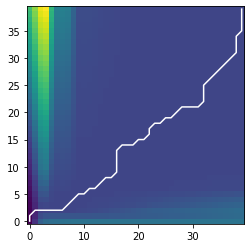

bass


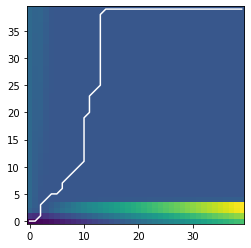

drums


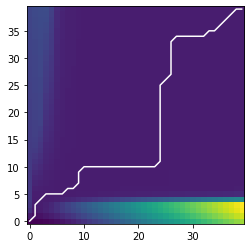

vocals


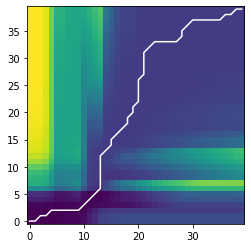

other


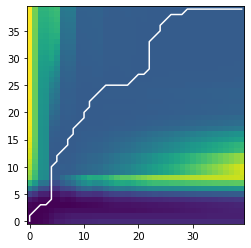

sheryl_crow_+Live_from_Central_Park+12-White_Room.mp3 vs cream+Live_Cream_Volume_II+02-White_Room.mp3



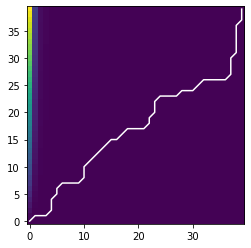

bass


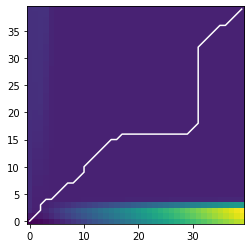

drums


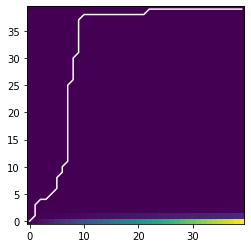

vocals


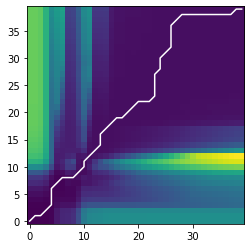

other


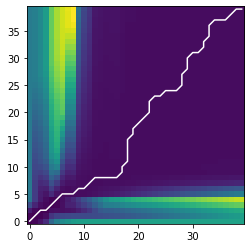

wyclef_jean+The_Ecleftic_2_Sides_II_A_Book+19-Wish_You_Were_Here.mp3 vs pink_floyd+Wish_You_Were_Here+04-Wish_You_Were_Here.mp3



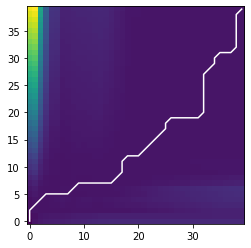

bass


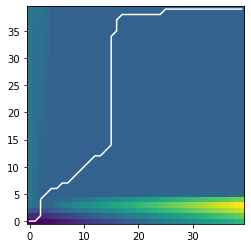

drums


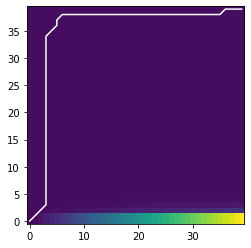

vocals


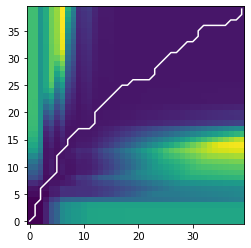

other


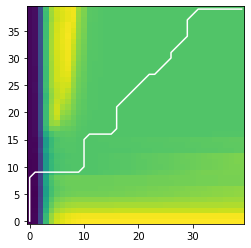

en_vogue+Funky_Divas+09-Yesterday.mp3 vs beatles+1+11-Yesterday.mp3



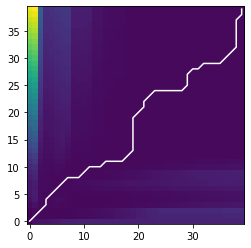

bass


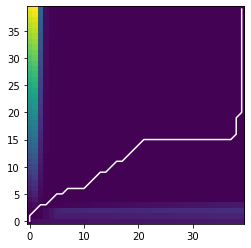

drums


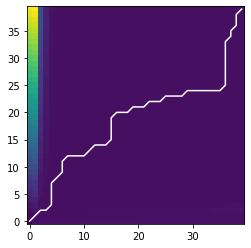

vocals


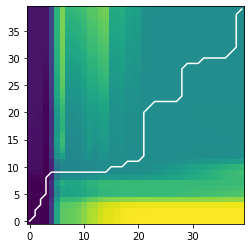

other


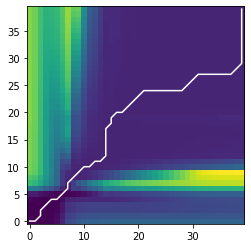

1.Juice WRLD - Lucid Dreams_Cpy.mp3 vs 1.yellowcard-holly-wood-died_Org.mp3



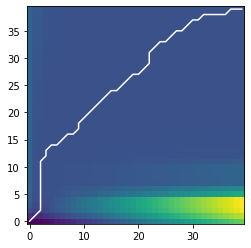

bass


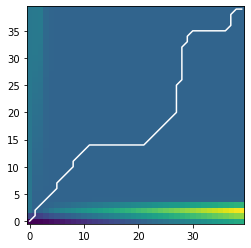

drums


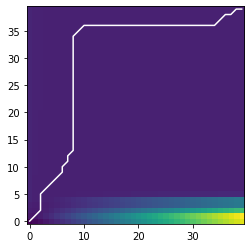

vocals


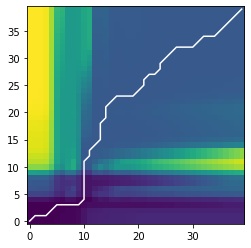

other


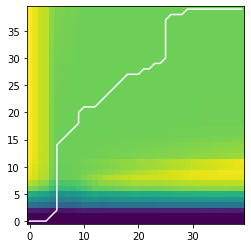

10.bruno-mars-uptown-funk_Cpy.mp3 vs 10.the-gap-band-oops-up-side-your-head_Org.mp3



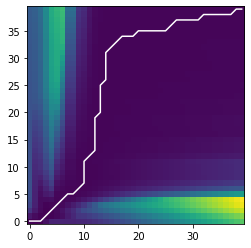

bass


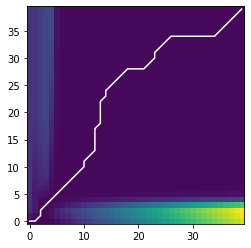

drums


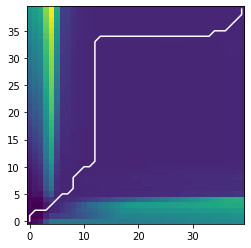

vocals


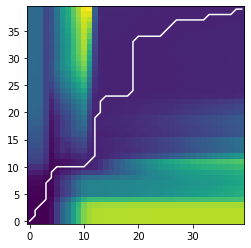

other


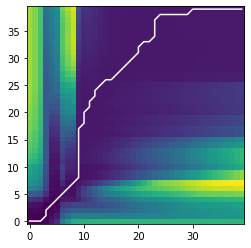

11.drake-who-do-you-love-feat_Cpy.mp3 vs 11.rappin-4-tay-playaz-club_Org.mp3



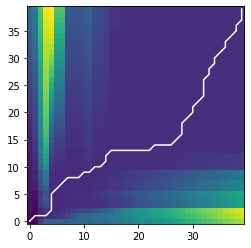

bass


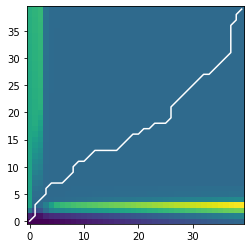

drums


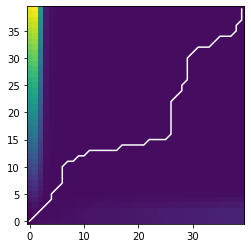

vocals


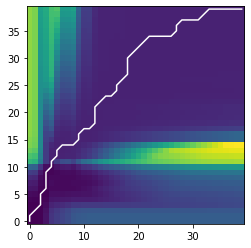

other


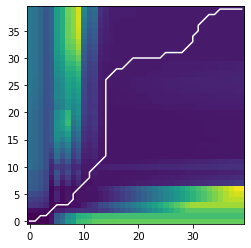

12.the-doors-hello-i-love-you_Cpy.mp3 vs 12.the-kinks-all-day-and-all-of-the-night_Org.mp3



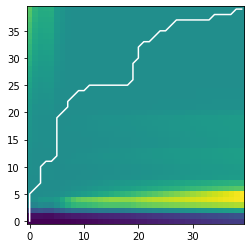

bass


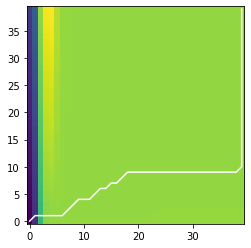

drums


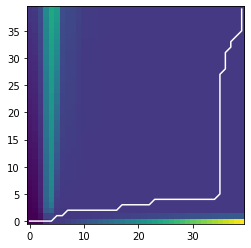

vocals


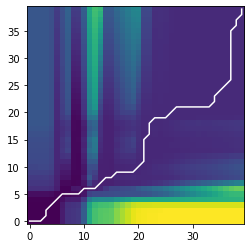

other


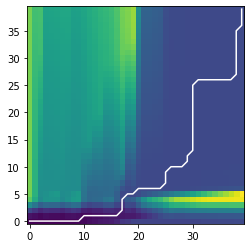

14.breakbot-baby-i-m-yours_Org.mp3 vs 14.bruno-mars-treasure_Cpy.mp3



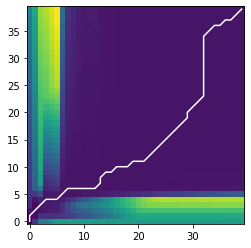

bass


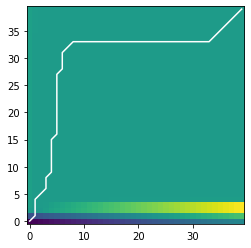

drums


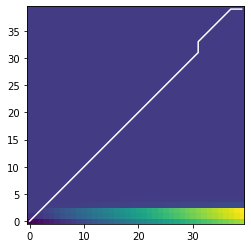

vocals


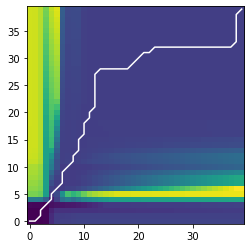

other


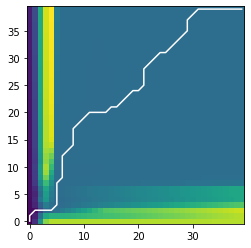

15.jake-holmes-dazed-and-confused_Org.mp3 vs 15.led-zeppelin-1969-i-dazed-and-confused_Cpy.mp3



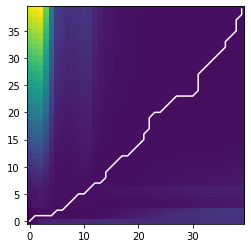

bass


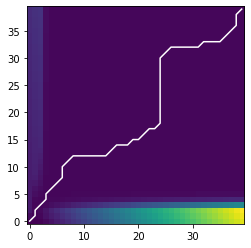

drums


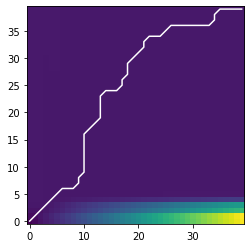

vocals


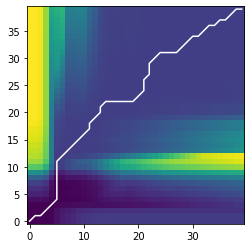

other


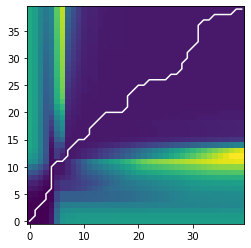

17.guns-n-39-roses-riad-n-39-the-bedouins_Cpy.mp3 vs 17.ulrich-schnauss-wherever-you-are_Org.mp3



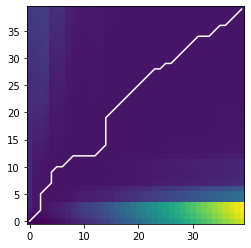

bass


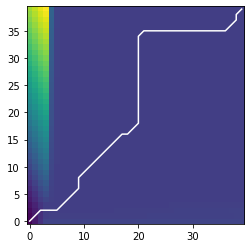

drums


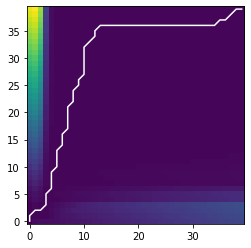

vocals


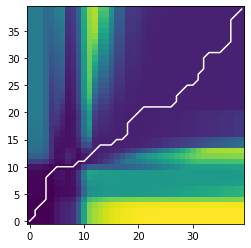

other


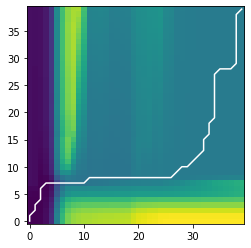

18.coldplay-viva-la-vida_Cpy.mp3 vs 18.joe-satriani-if-i-could-fly_Org.mp3



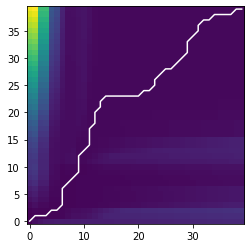

bass


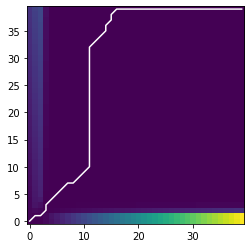

drums


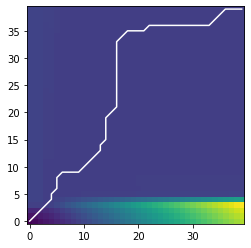

vocals


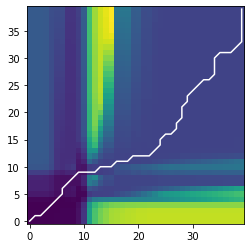

other


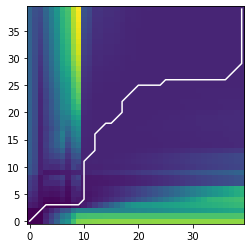

19.adam-freeland-mancry_Org.mp3 vs 19.the-black-eyed-peas-party-all-the-time_Cpy.mp3



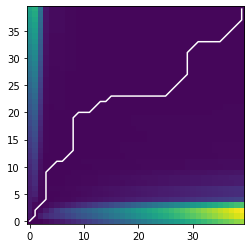

bass


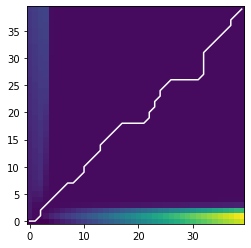

drums


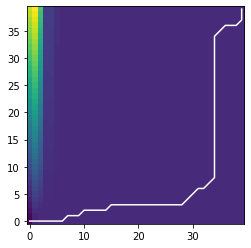

vocals


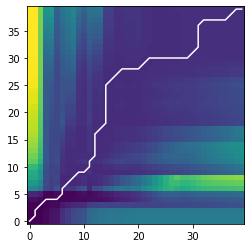

other


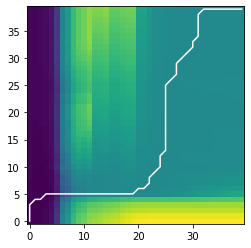

2.lana-del-rey-get-free_Cpy.mp3 vs 2.radioheard-creep_Org.mp3



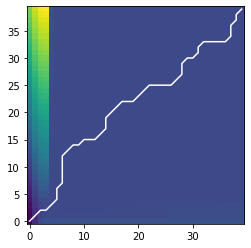

bass


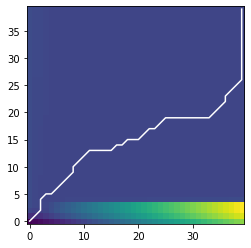

drums


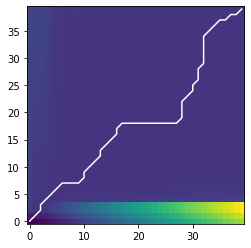

vocals


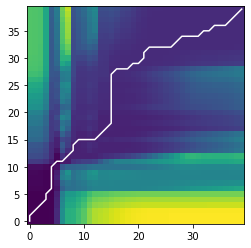

other


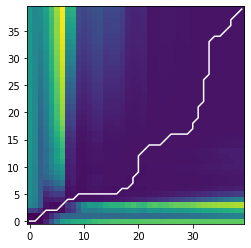

20.avril-lavin-girlfriend_Cpy.mp3 vs 20.the-rubinoos-i-wanna-be-your-boyfriend_Org.mp3



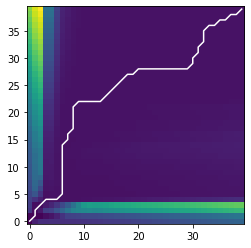

bass


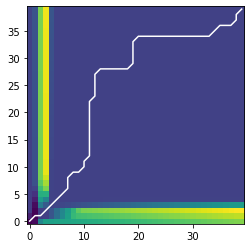

drums


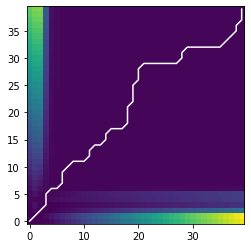

vocals


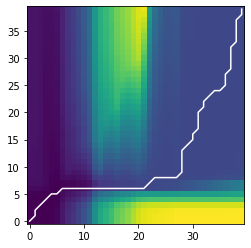

other


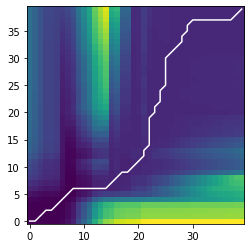

21.jorge-ben-taj-mahal_Org.mp3 vs 21.rod-stewart-da-ya-think-i-m-sexy_Cpy.mp3



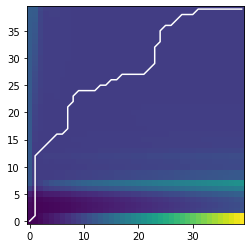

bass


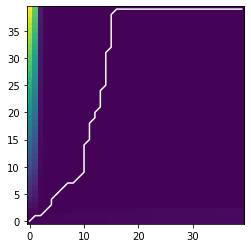

drums


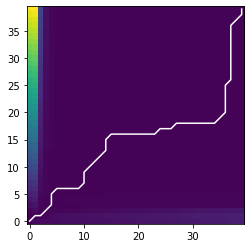

vocals


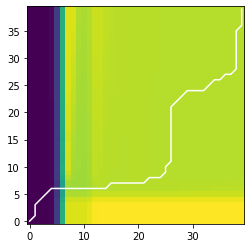

other


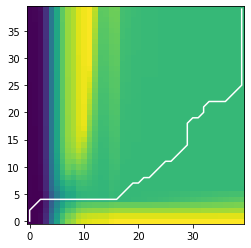

22.eddy-and-danny-van-passel-if-we-can-start-all-over_Org.mp3 vs 22.michael-jackson-you-are-not-alone_Cpy.mp3



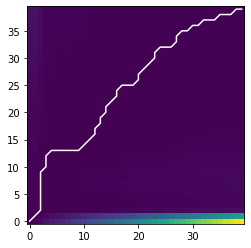

bass


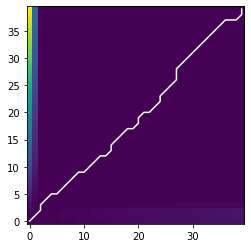

drums


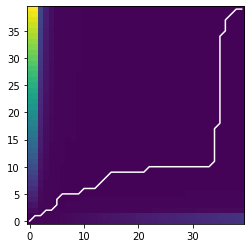

vocals


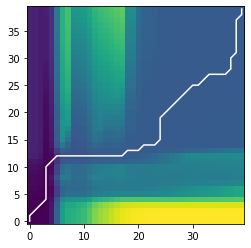

other


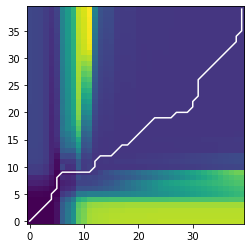

23.jamie-rivera-my-life-is-in-your-hands_Cpy.mp3 vs 23.kathy-troccoli-my-life-is-in-your-hands_Org.mp3



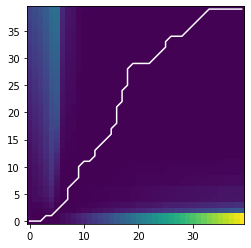

bass


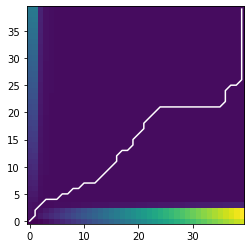

drums


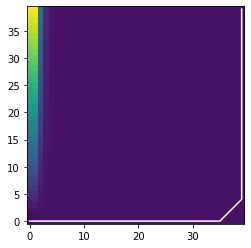

vocals


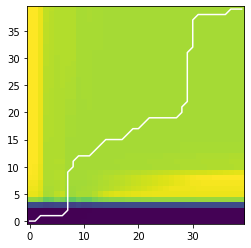

other


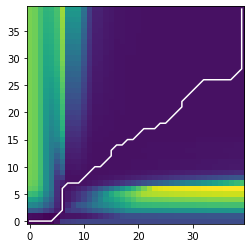

24.cat-stevens-father-and-son_Org.mp3 vs 24.the-flaming-lips-fight-test_Cpy.mp3



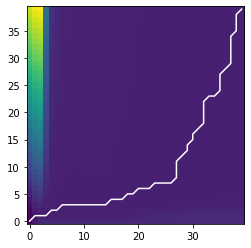

bass


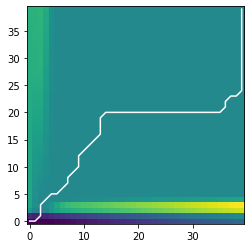

drums


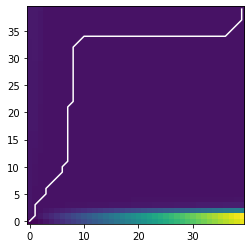

vocals


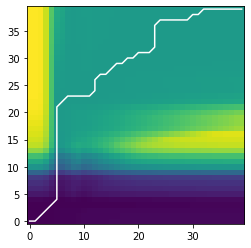

other


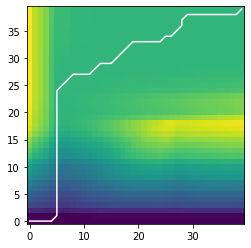

25.eminem-kill-you_Cpy.mp3 vs 25.jacques-loussier-pulsion_Org.mp3



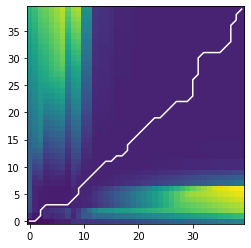

bass


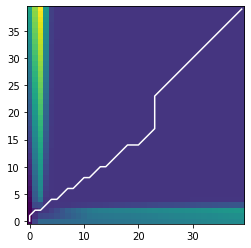

drums


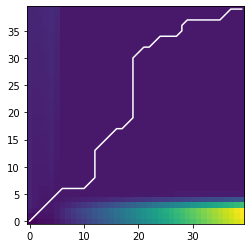

vocals


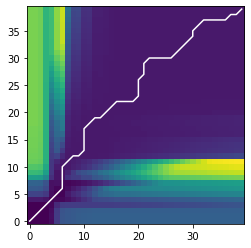

other


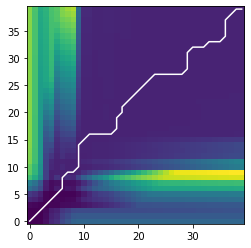

26.robert-johnson-stop-breakin-39-down-blues_Org.mp3 vs 26.the-rolling-stones-stop-breaking-down_Cpy.mp3



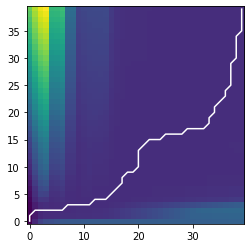

bass


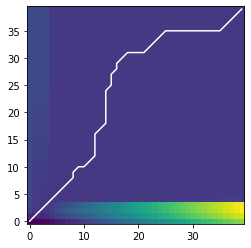

drums


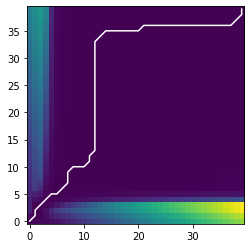

vocals


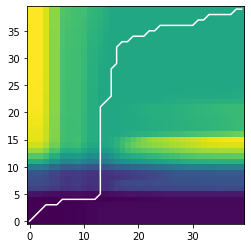

other


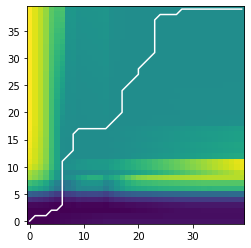

27.robert-johnson-love-is-vain_Org.mp3 vs 27.the-rolling-stones-love-in-vain_Cpy.mp3



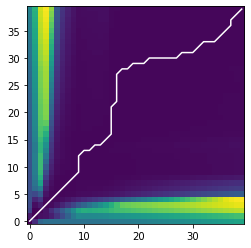

bass


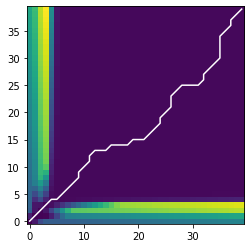

drums


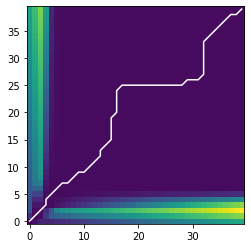

vocals


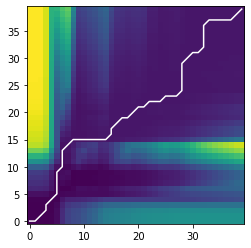

other


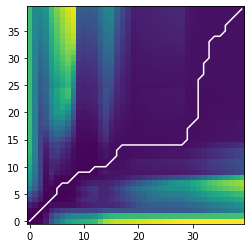

28.kraftwerk-metal-on-metal_Org.mp3 vs 28.sabrina-setlur-nur-mir-1997_Cpy.mp3



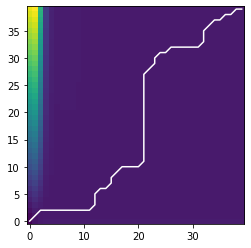

bass


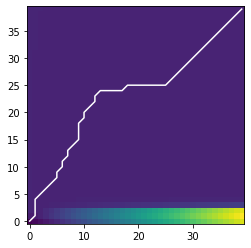

drums


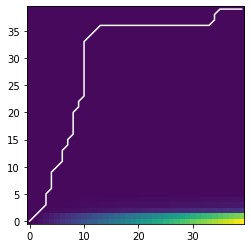

vocals


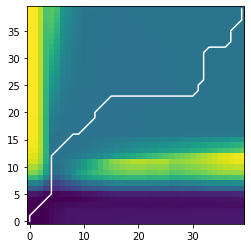

other


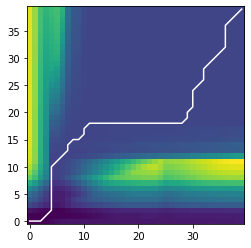

29.the-rolling-stones-the-last-time_Org.mp3 vs 29.the-verve-bitter-sweet_Cpy.mp3



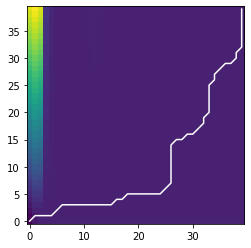

bass


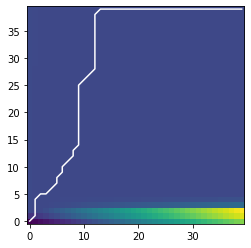

drums


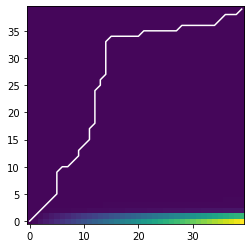

vocals


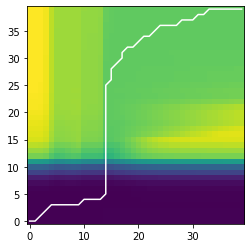

other


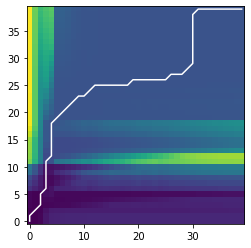

30.des-39-ree-feel-so-high_Org.mp3 vs 30.janet-jackson-got-til-its-gone_Cpy.mp3



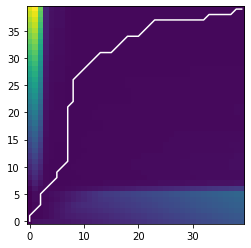

bass


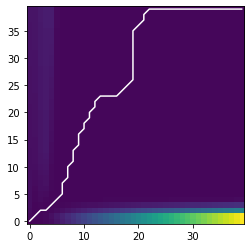

drums


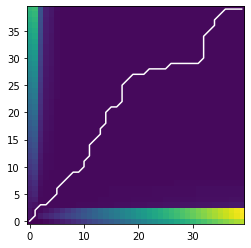

vocals


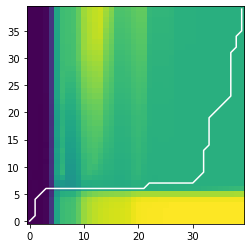

other


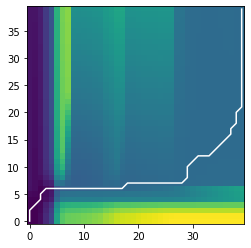

31.glen-miller-in-the-mood_Org.mp3 vs 31.the-beatles-all-you-need-is-love__Cpy.mp3



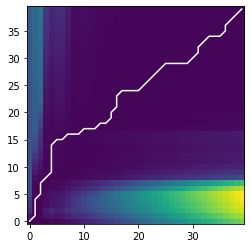

bass


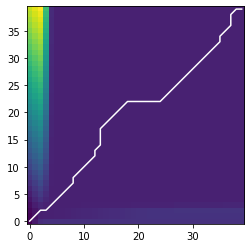

drums


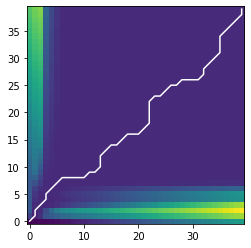

vocals


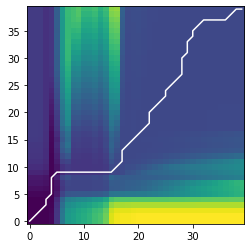

other


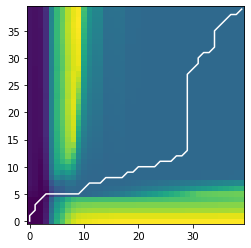

32.the-doors-hello-i-love-you_Cpy.mp3 vs 32.the-kinks-all-day-and-all-of-the-night_Org.mp3



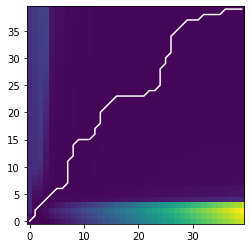

bass


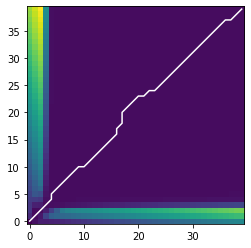

drums


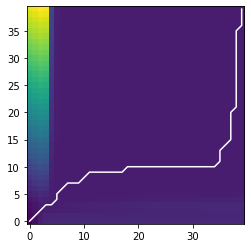

vocals


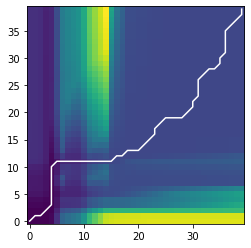

other


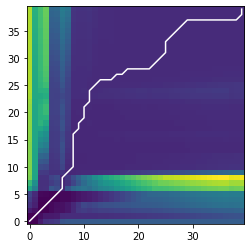

33.chuck-berry-you-cant-catch-me_Org.mp3 vs 33.the-beatles-come-together_Cpy.mp3



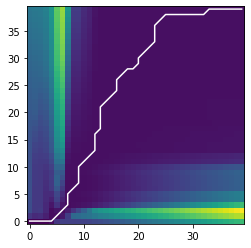

bass


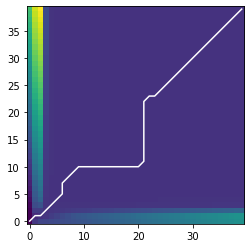

drums


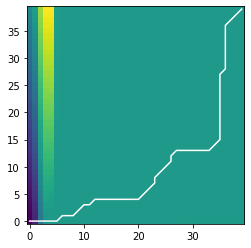

vocals


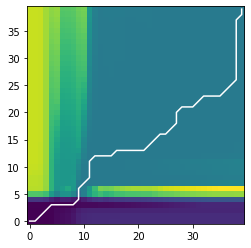

other


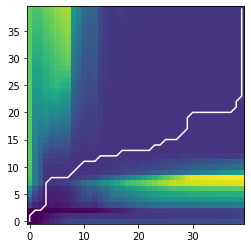

34.howlin-wolf-killing-floor_Org.mp3 vs 34.led-zeppelin-the-lemon-song_Cpy.mp3



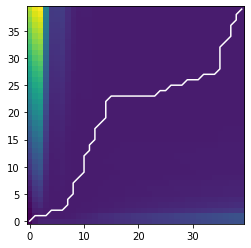

bass


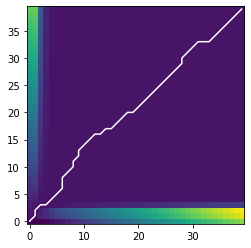

drums


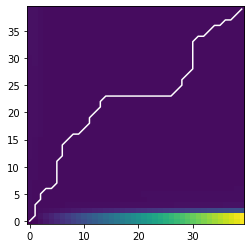

vocals


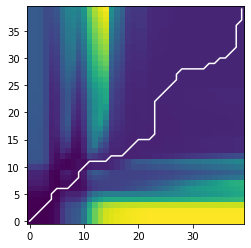

other


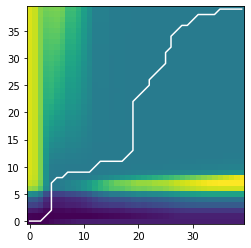

35.huey-lewis-the-news-i-want-a-new-drug_Org.mp3 vs 35.ray-parker-jr-ghostbusters_Cpy.mp3



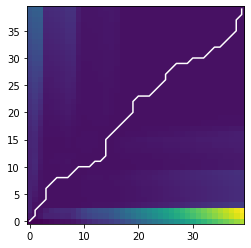

bass


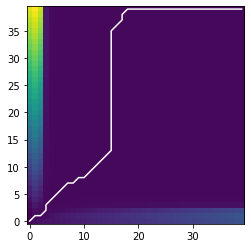

drums


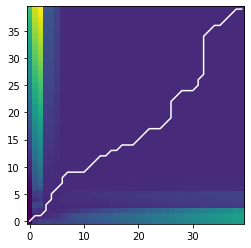

vocals


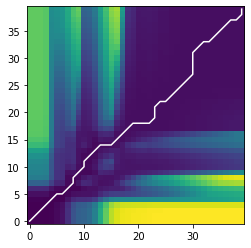

other


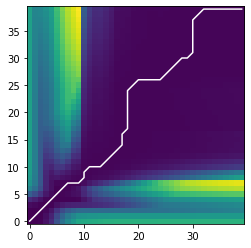

36.led-zeppelin-whole-lotta-love_Cpy.mp3 vs 36.muddy-waters-you-need-love_Org.mp3



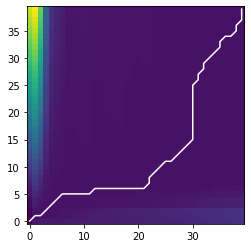

bass


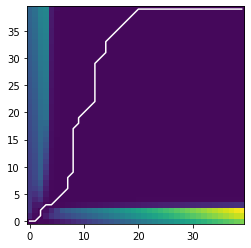

drums


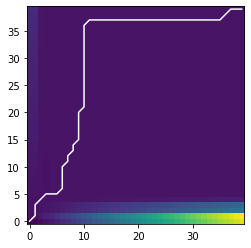

vocals


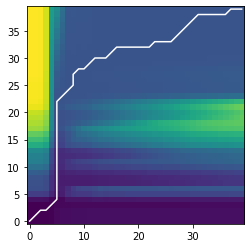

other


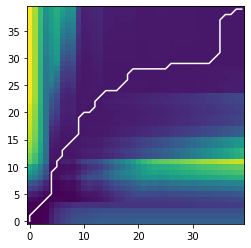

37.am-harris-sugar-don-39-t-bite_Org.mp3 vs 37.creedence-clearwater-revival-run-through-the-jungle_Org.mp3



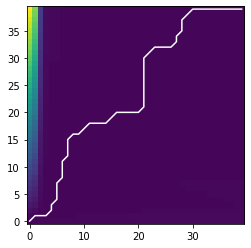

bass


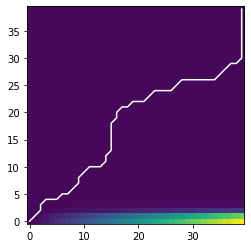

drums


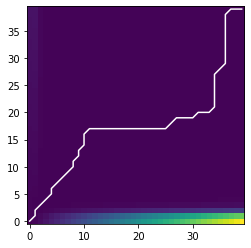

vocals


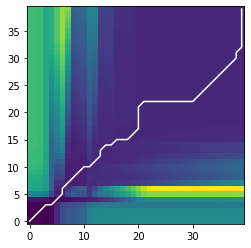

other


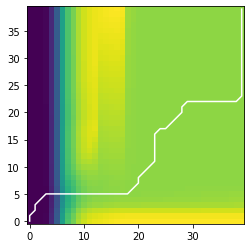

37.am-harris-sugar-don-39-t-bite_Org.mp3 vs 37.madonna-papa-dont-preach_Cpy.mp3



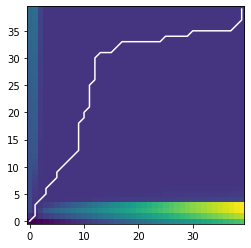

bass


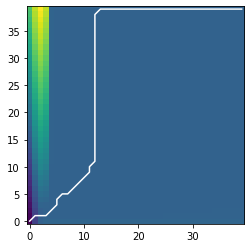

drums


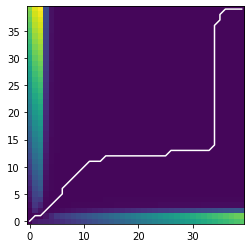

vocals


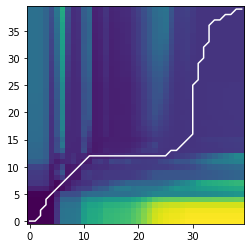

other


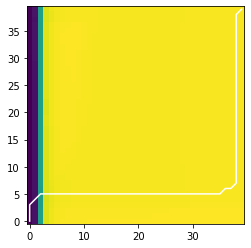

37.john-fogerty-the-old-man-down-the-road_Org.mp3 vs 37.am-harris-sugar-don-39-t-bite_Org.mp3



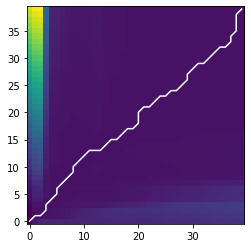

bass


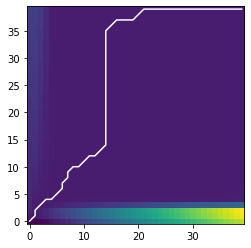

drums


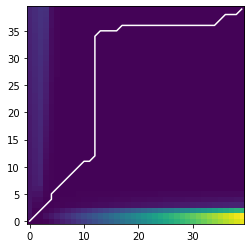

vocals


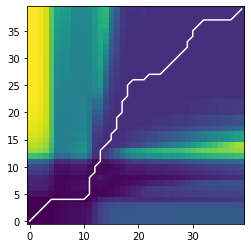

other


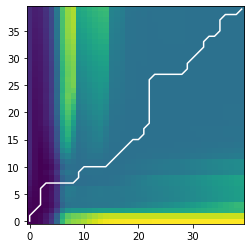

38.the-turtles-you-showed-me_Org.mp3 vs 38.de-la-soul-transmitting-live-from-mars_Cpy.mp3



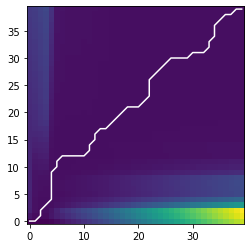

bass


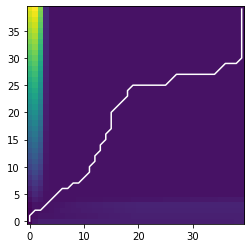

drums


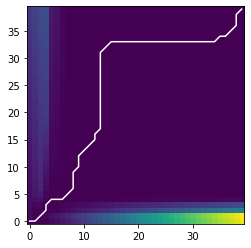

vocals


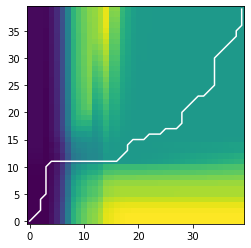

other


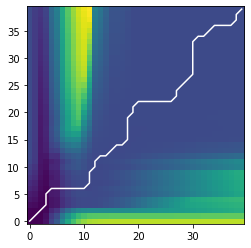

39.steve-winwood-roll-with-it_Cpy.mp3 vs 39.jr-walker-amp-the-all-stars-i-39-m-a-roadrunner_Org.mp3



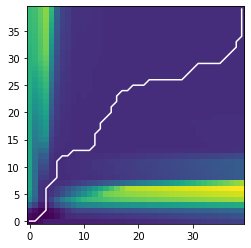

bass


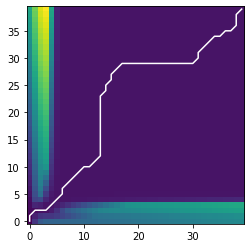

drums


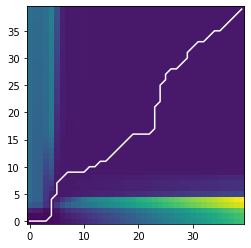

vocals


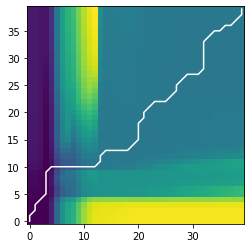

other


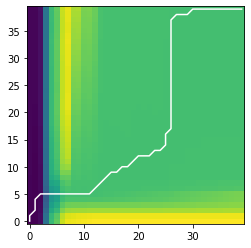

4.thinking-out-loud-ed-sheeran_Cpy.mp3 vs 4.marvin-gaye-let-s-get-it-on-marvin-gaye_Org.mp3



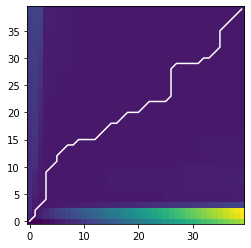

bass


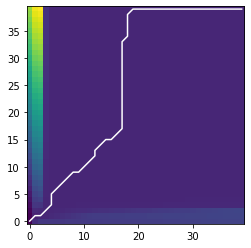

drums


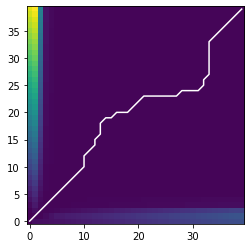

vocals


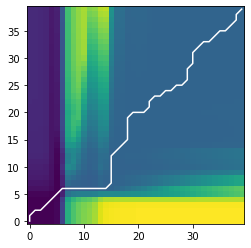

other


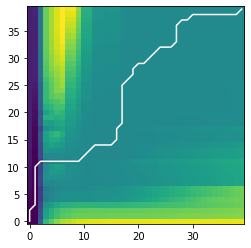

40.queen-under-pressure-queen-david-bowie_Cpy.mp3 vs 40.ice-ice-baby-vanilla-ice_Cpy.mp3



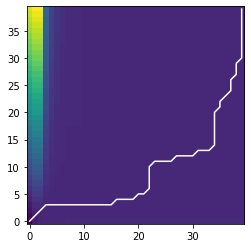

bass


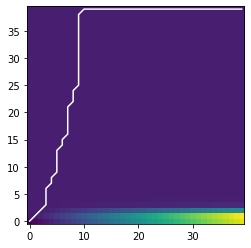

drums


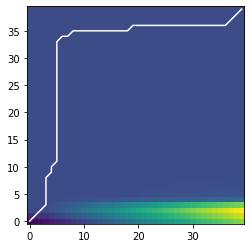

vocals


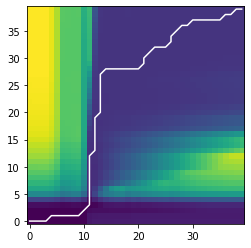

other


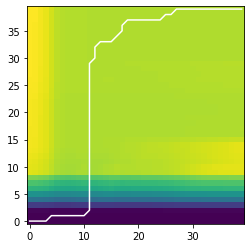

41.creep-radiohead_Cpy.mp3 vs 41.albert-hammond-the-air-that-i-breathe_Org.mp3



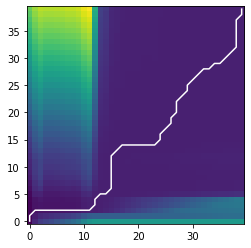

bass


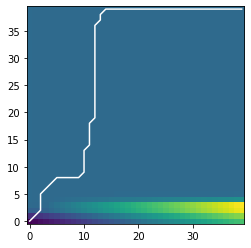

drums


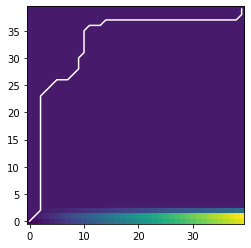

vocals


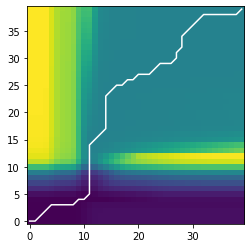

other


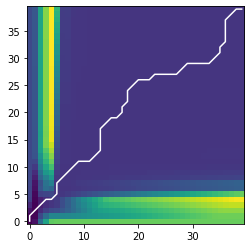

42.oasis-whatever_Cpy.mp3 vs 42.neil-innes-how-sweet-to-be-an-idiot_Org.mp3



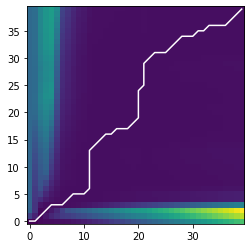

bass


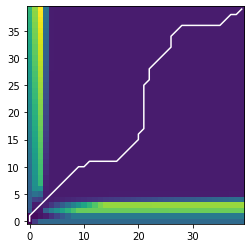

drums


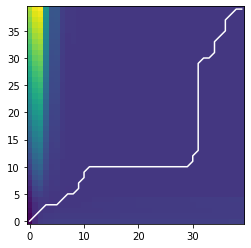

vocals


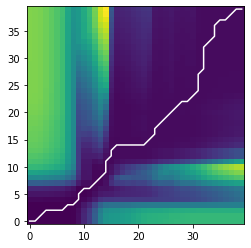

other


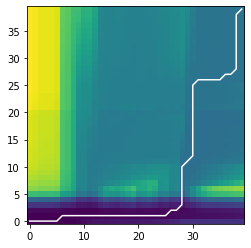

43.the-isley-brothers-love-is-a-wonderful-thing_Org.mp3 vs 43.michael-bolton-love-is-a-wonderful-thing_Cpy.mp3



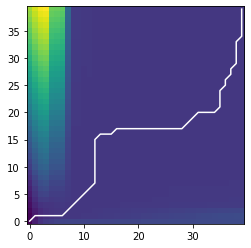

bass


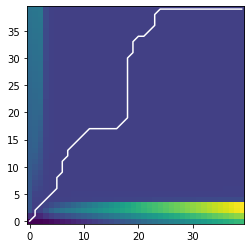

drums


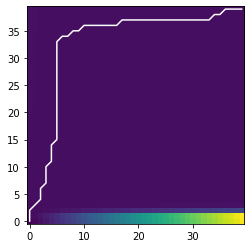

vocals


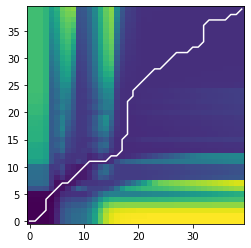

other


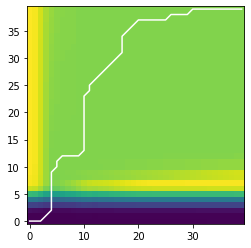

44.stevie-wonder-uptight-uk-nme-top40-3-02-66_Org.mp3 vs 44.oasis-step-outremastered_Cpy.mp3



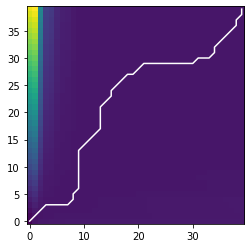

bass


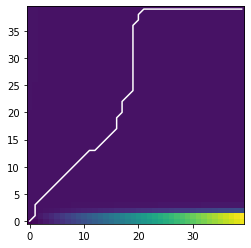

drums


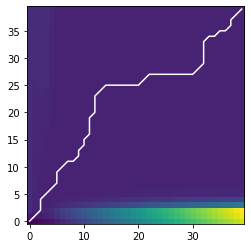

vocals


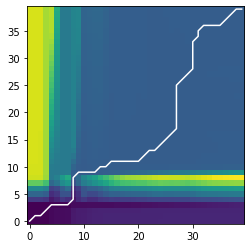

other


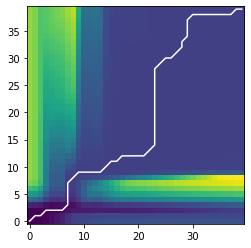

45.the-new-seekers-i-39-d-like-to-teach-the-world-to-sing-in-perfect-harmony_Cpy.mp3 vs 45.oasis-shakermaker_Cpy.mp3



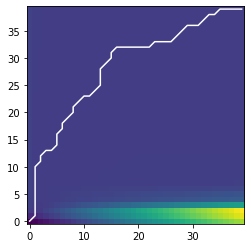

bass


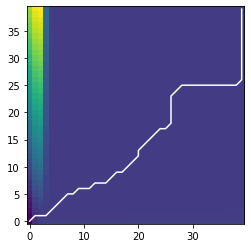

drums


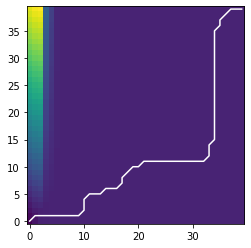

vocals


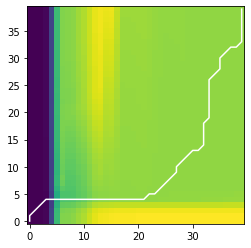

other


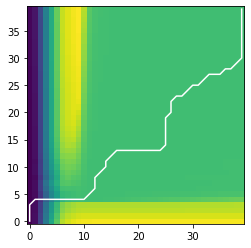

46.the-police-every-breath-you-take_Org.mp3 vs 46.p-diddy-ill-be-missing-you-p-diddy-ill-be-missing-yo_Cpy.mp3



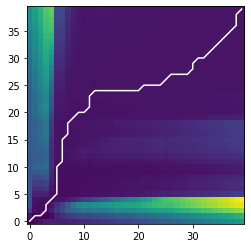

bass


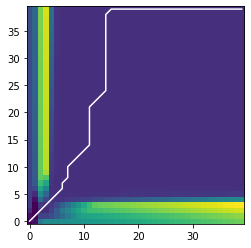

drums


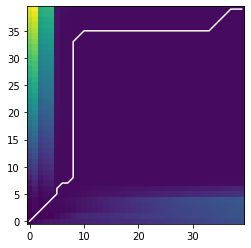

vocals


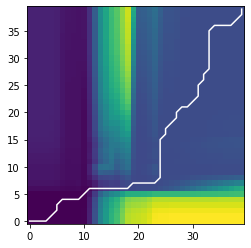

other


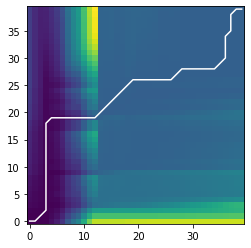

47.the-rolling-stones-anybody-seen-my-baby_Cpy.mp3 vs 47.kd-lang-constant-craving_Org.mp3



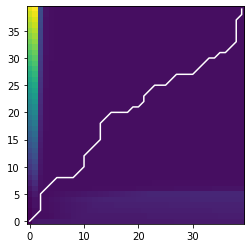

bass


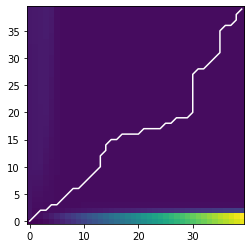

drums


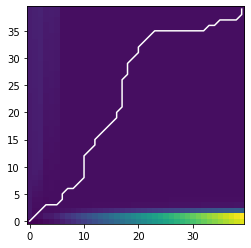

vocals


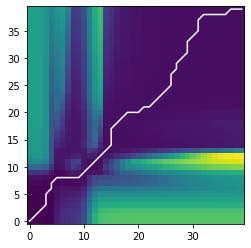

other


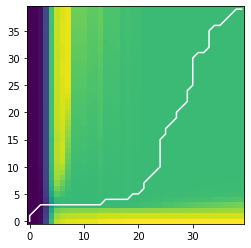

5.jasmine-rae-when-i-found-you_Org.mp3 vs 5.faith-hill-tim-mcgraw-the-rest-of-our-life_Cpy.mp3



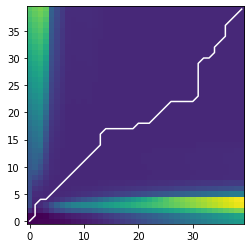

bass


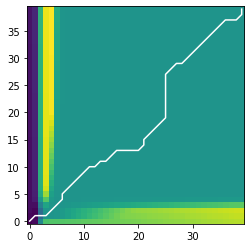

drums


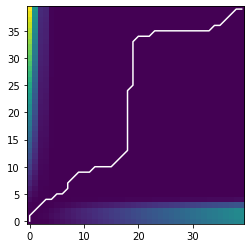

vocals


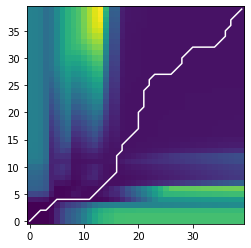

other


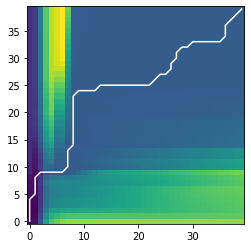

6.the-white-stripers-seven-nation-army_Org.mp3 vs 6.netta-toy-toy_Cpy.mp3



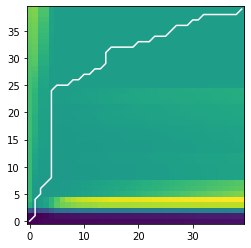

bass


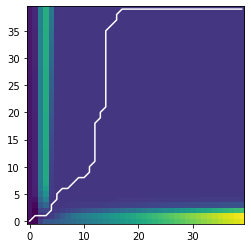

drums


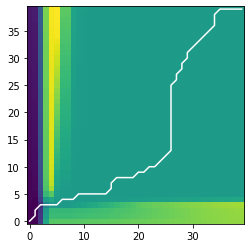

vocals


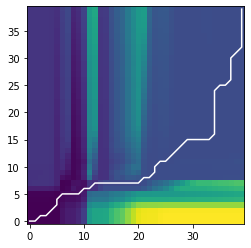

other


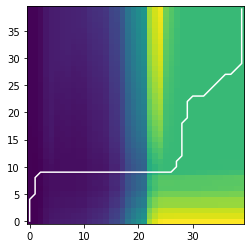

7.tlc-no-scrubs_Org.mp3 vs 7.shape-of-you-ed-sheeran_Cpy.mp3



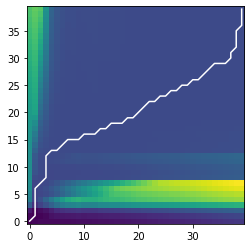

bass


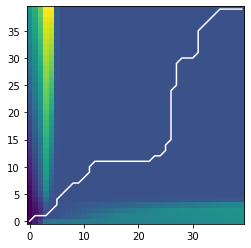

drums


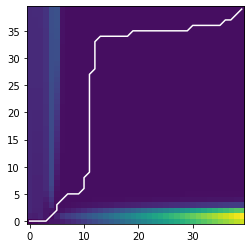

vocals


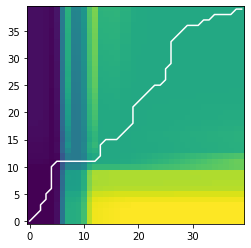

other


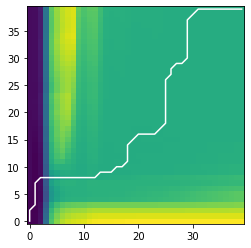

8.matt-cardle-amazing_Org.mp3 vs 8.ed-sheeran-photograph-photograph_Cpy.mp3



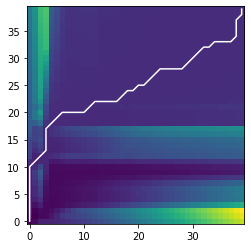

bass


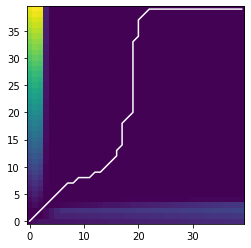

drums


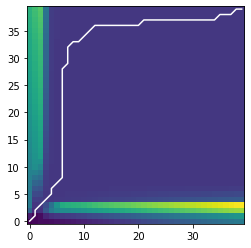

vocals


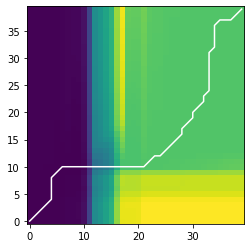

other


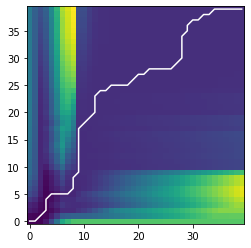

In [43]:
# Importing dataset
import os
from os import listdir
from os import path
from os.path import isfile, join, getsize
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

os.chdir('/home/jupyter-chandler.vaughn/data/')
merged_training_MFCC_DTW = pd.read_pickle('merged_training_MFCC_DTW.pickle')
plagerism_unseen_MFCC_DTW = pd.read_pickle('plagerism_unseen_MFCC_DTW.pickle')
stems = ['','_bass','_drums','_vocals','_other']

#print covers only
for idx, row in  merged_training_MFCC_DTW.iterrows():
    if row['target'] == 1:
        print(song_1 +' vs '+song_2)
        for item in stems:
            print(item.replace('_', ''))
            DTW_acc_cost_matrix = 'DTW_acc_cost_matrix' + item
            DTW_path = 'DTW_path' + item

            acc_cost_matrix = row[DTW_acc_cost_matrix]
            path = row[DTW_path]
            song_1 = row['song_1']
            song_2 = row['song_2']

            plt.imshow(acc_cost_matrix.T, origin='lower', interpolation='nearest')
            plt.plot(path[0], path[1], 'w')
            plt.show()


    
for idx, row in  plagerism_unseen_MFCC_DTW.iterrows():
    print(song_1 +' vs '+song_2)
    for item in stems:
        print(item.replace('_', ''))
        DTW_acc_cost_matrix = 'DTW_acc_cost_matrix' + item
        DTW_path = 'DTW_path' + item
        
        acc_cost_matrix = row[DTW_acc_cost_matrix]
        path = row[DTW_path]
        song_1 = row['song_1']
        song_2 = row['song_2']

        plt.imshow(acc_cost_matrix.T, origin='lower', interpolation='nearest')
        plt.plot(path[0], path[1], 'w')
        plt.show()